# Literature Review Analysis

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import matplotlib.transforms
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
import matplotlib.cm as cm
import matplotlib.axes
from matplotlib import transforms
import seaborn as sns; sns.set()
plt.style.use('default')

## Reading the .csv file

In [2]:
# import the csv. file of the taxonomy results here
review_analysis = pd.read_csv(r"Literature_Taxonomy.csv")

In [3]:
len(review_analysis)

492

## Category Variables

In [4]:
# General Context
scopus_search_categories = ['Original_Search', 'Forward_Search', 'Backward_Search']
year_published_categories = ['1991', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
jcr_category_categories = ['HCSS', 'HPS', 'IE', 'MI', 'ORMS', 'TandO', 'JCR_None']
paper_type_categories = ['Article', 'Conference_Paper']
collection_method_categories = ['Data_Driven', 'Collaberation']
data_source_categories = ['Primary_Data', 'Secondary_Data', 'Expert_Opinion']
level_of_implementation_categories = ['Theoretical', 'Conceptualised', 'Implemented']
continent_categories = ['Africa', 'Asia', 'Europe', 'North_America', 'Oceania', 'South_America', 'No_Continent']
funding_categories = ['Academia', 'Authorities', 'Commerce', 'Grants', 'Health_Services', 'No_Mention', 'No_Funder']

# Medical context
t_and_o_area_categories = ['Fractures', 'Sports', 'Spine', 'Pediatrics', 'Shoulder', 'Elbow', 'Hands', 'Foot_and_Ankle', 'Knee', 'Hip', 'General']
condition_area_categories = ['Acute', 'Chronic', 'CA_Surgical']
care_area_categories = ['Primary_Care', 'Secondary_Care', 'Tertiary_Care', 'Community_Care', 'Patient_Progression_Care', 'No_Care_Area']
scope_categories = ['Clinical', 'Department', 'Hospital']
pathway_categories = ['Patient_Assessment', 'Outpatients', 'Inpatients', 'Pathway_Surgery', 'Post_Surgery', 'Rehab', 'Follow_Up']
perspective_categories = ['Patient', 'Provider', 'Societal']
research_aims_categories = ['Evaluating', 'Forecasting', 'Improving']

# Methodological context
or_area_categories = ['Decision_Analysis', 'Graph_Theory', 'Heuristics', 'Markov_Model', 'MCDM', 'Optimisation', 'Queuing_Theory', 'Simulation', 'Soft_OR', 'Statistical']
primary_method_categories = ['ABM', 'AHP', 'Break_Even', 'Decision_Tree', 'Delphi', 'DES', 'Genetic_Algorithm', 'Goal_Programming', 'Integer_Programming', 'Knapsack', 'Mathematical_Model', 'Microsimulation', 'MILP', 'Markov_Method', 'Monte_Carlo', 'Neighbourhood', 'PSO', 'Queuing_Model', 'Scatter_Search', 'SNA', 'Statistical_Analysis', 'SD', 'Tabu_Search']
secondary_method_categories = ['Delphi2nd', 'DES2nd', 'Microsimulation2nd', 'Monte2nd', 'Sensitivity2nd', 'Simulation2nd', 'NoSecond']
outcome_categories = ['Cost', 'Health', 'Time']
planning_level_categories = ['Strategic', 'Tactical', 'Operational_Offline', 'Operational_Online', 'No_Planning']
functional_area_categories = ['Bed_Management', 'Capacity_Planning', 'Cost_Analysis', 'Cost_Effectiveness', 'Cost_Utility', 'Expected_Value', 'Health_Utility', 'Location_Planning', 'Manufacturing', 'Medical_Decision', 'Medical_Simulation', 'Patient_Scheduling', 'Risk_Benefit', 'Staff_Utilisation', 'System_Design']

## Functions

In [5]:
def literature_analysis(data_frame, category, citation_keys=False):
    """
    For a given list of classifications, this function returns the total number of papers classified as each element in the list.
    
    Arguments:
    data_frame -- Data frame of the taxonomy results, named in this notebook as review_analysis.
    category -- A list of classifications.
    citation_keys -- If set to True, returns the citation keys of all papers classified as each classification in 'category'.
    """
    total = [] # Empty list for storing the totals
    keys = [] # Empty list for storing the citation keys
    for i in category: # For each element in 'category'
        total.append(len(review_analysis[review_analysis[i]==1])) # Append the total list with the number of papers classified as the given variable
    if citation_keys == True:
        for i in category: # For each element in 'category'
            keys.append(review_analysis[review_analysis[i]==1]["CitationKey"]) # Append the keys list with a list of all the citation keys of papers classified as such
        return(total, keys)
    else: return(total)

In [6]:
def cross_analysis(review_data, category, category_labels, category2=False, category_labels2=False):
    """
    This function returns a dataframe of a cross analysis of two categories in the taxonomy.
    
    Arguments:
    review_data -- data frame of the taxonomy results, named in this notebook as review_analysis
    category -- a list of classifications
    category_labels -- a list of labels to use as the row headings for the output dataframe
    category2 -- a second list of classifications. when set to False, it will cross-analyse the first category list against itself
    category_labels2 -- a list of labels to use as the column headings for the output dataframe. when set to False, it uses the elements in category_labels
    """
    if category2 == False: # Where category2 is False, set all category2 arguments to be the same as the category arguements
        category_labels2 = category_labels
        category2 = category
    df = np.zeros((len(category_labels), len(category_labels2))) # Empty data frame with rows equal to the length of category_labels, and columns equal to the length of category_labels2
    m = 0 # Set row ticker to be 0
    for i in category: # For each element in the category list
        n = 0 # Set column ticker to be 0
        for j in category2: # For each element in the category2 list
            df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'
            n = n + 1 # Iterate to the next column
        m = m + 1 # Iterate to the next row
    df = pd.DataFrame(df) # Convert to pandas dataframe
    df.columns = category_labels2 # Set the column headings to be the same as category_labels2
    df.index = category_labels # Set the row headings to be the same as category_labels
    return(df)

In [7]:
def normalised_heat_map(cross_analysis_, fig_size=(8, 6), colourmap='Greys', v_min=0, v_max=100, line_width=.5, annotate=False,  cbar_kws=False, annotkws={"fontsize":8}):
    """
    Returns a normalised by row heatmap of a cross analysis of classifications.
    
    Arguments:
    cross_analysis_ -- a dataframe of a cross analysis of two categories in the taxonomy
    fig_size -- the output size of the heatmap figure
    colourmap -- a string containing the colour map to be used for the heatmap
    v_min -- the minimum value for the colour map
    v_max -- the maximum value for the colour map
    line_width -- adjusts the thickness of the lines separating cells in the heatmap
    annotate -- takes a numpy dataframe to use custom labelling of the cells in the heatmap
    cbar_kws -- labelling of the colourbar for the colour map
    annotkws -- the fontsize of the cell labels of the heatmap
    """
    cross_analysis_rowsums = cross_analysis_.sum(1)
    cross_analysis2 = cross_analysis_.copy()

    for i in range(len(cross_analysis_)): # For each row of the cross analysis dataframe
        for j in range(len(cross_analysis_.columns)): # For each column of the cross analysis dataframe
            cross_analysis2.iloc[i,j] = (cross_analysis_.iloc[i,j]/cross_analysis_rowsums[i])*100 # Calculate the percentage of the row total that the value of each cell in that row corresponds to

    fig = plt.figure(num=None, figsize=fig_size, dpi=80, facecolor='w', edgecolor='k')
    plt.clf()
    ax = fig.add_subplot(111)
    res = sns.heatmap(cross_analysis2, annot=annotate, cmap=colourmap, cbar_kws=cbar_kws, vmin=v_min, vmax=v_max, linewidth=line_width, fmt='g', annot_kws=annotkws) # Plot a heatmap of the results

In [8]:
def add_labels(x,y,plus=2):
    """
    Adds custom labels onto the bar charts in this analysis
    """
    for i in range(len(x)):
        plt.text(i, y[i]+plus, y[i], ha = 'center')

In [9]:
def percentage(DataList):
    """
    Returns the percentage of the total number of papers in the analysis for a list of values
    """
    Percents = []
    for i in range(len(DataList)):
        Percents.append((DataList[i]/len(review_analysis))*100)
    return(Percents)

## General Context

### Scopus Search

In [10]:
scopus_search_labels = ["Original", "Forward", "Backward"] # Labels for the Scopus search category classifications
scopus_search = literature_analysis(review_analysis, scopus_search_categories)
scopus_search

[281, 155, 56]

Text(0, 0.5, 'Number of Papers')

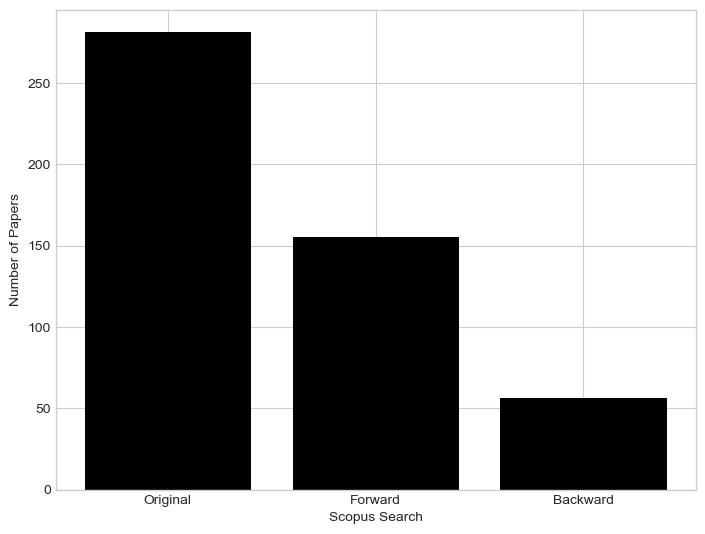

In [11]:
# Plot a bar chart for the results of the Scopus search category
fig = plt.figure()
plt.style.use('seaborn-whitegrid')
scopus_search_plot = fig.add_axes([0,0,1,1])
scopus_search_plot.bar(scopus_search_labels, scopus_search, color='black')
plt.xlabel('Scopus Search')
plt.ylabel('Number of Papers')

### Year of Publication

In [12]:
literature_analysis(review_analysis, ["2022"]) # How many papers were published in 2022

[42]

In [13]:
# Labels for the various graphs relating to the year published
year_published_labels = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
year_published_labels3 = ['1990-1993', '1994-1997', '1998-2001', '2002-2005', '2006-2009', '2010-2013', '2014-2017', '2018-2021']
year_published_labels5 = [1991, ' ', ' ', ' ', ' ', 1996, ' ', ' ', ' ', ' ', 2001, ' ', ' ', ' ', ' ', 2006, ' ', ' ', ' ', ' ', 2011, ' ', ' ', ' ', ' ', 2016, ' ', ' ', ' ', ' ', 2021]

year_published = literature_analysis(review_analysis, year_published_categories)
year_published.insert(1, 0) # Insert 0 papers for the year 1992
year_published.insert(0, 0) # Insert 0 papers for the year 1990
year_published.insert(2, 0) # Insert 0 papers for the year 
year_published.pop(32) # Remove 2022 as papers were only collected for part of the year
new_year_published = year_published.copy()
del new_year_published[0]

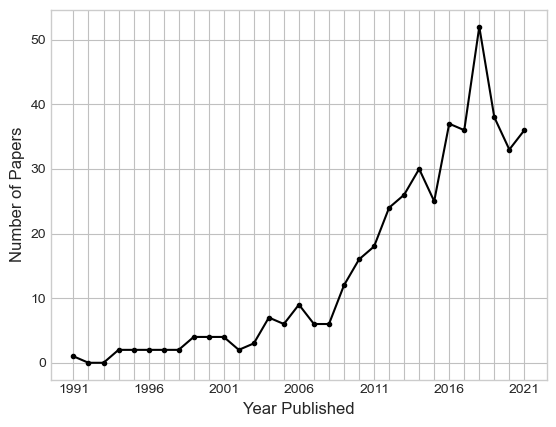

In [14]:
# Line graph for the number of papers published per year
df = pd.DataFrame(new_year_published, index=year_published_labels5)
df.plot.line(color='black', legend=False, style='.-')
plt.xlabel('Year Published', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.xticks(range(len(year_published_labels5)))
plt.grid(color='silver', axis='both')
plt.savefig("plots/YearPublished.pdf", transparent=True, bbox_inches='tight')

### Journal Citation Reports (JCR) Category

In [15]:
# Labels for figures relating to the JCR Category classifications
jcr_category_labels = ['HCSS', 'HPS', 'IE', 'MI', 'OR/MS', 'T&O', 'Other']
jcr_category_labels2 = ['T&O', 'Other', 'HCSS', 'HPS', 'OR/MS', 'MI', 'IE'] # Sorted by size (largest to smallest)
jcr_category = literature_analysis(review_analysis, jcr_category_categories)
jcr_category

[61, 46, 6, 14, 23, 301, 91]

In [16]:
jcr_category3 = jcr_category.copy()
jcr_category3.sort(reverse=True) # Sort results

In [17]:
percentage(jcr_category)

[12.398373983739837,
 9.34959349593496,
 1.2195121951219512,
 2.8455284552845526,
 4.67479674796748,
 61.17886178861789,
 18.495934959349594]

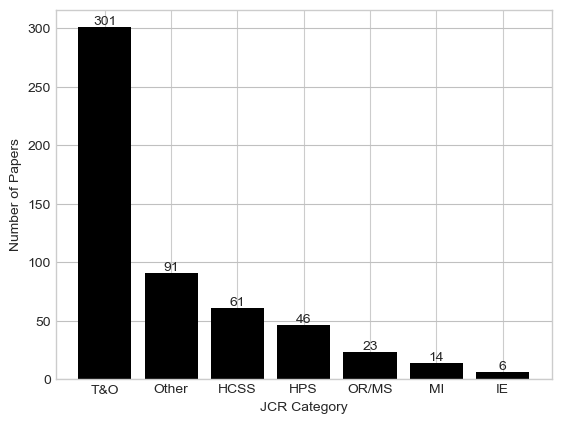

In [18]:
# Plot bar chart of the results of the JCR Category classification
fig = plt.figure()
plt.bar(jcr_category_labels2, jcr_category3, color='black')
plt.xlabel('JCR Category')
plt.ylabel('Number of Papers')
plt.grid(color='silver', axis='y')
add_labels(jcr_category3, jcr_category3) 
plt.savefig("plots/JCRCategory.pdf", transparent=True, bbox_inches='tight')

In [19]:
# Cross-analysis of the Scopus Search category vs. the JCR Category
scopus_search_jcr_category = cross_analysis(review_analysis, scopus_search_categories, scopus_search_labels, jcr_category_categories, jcr_category_labels)

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


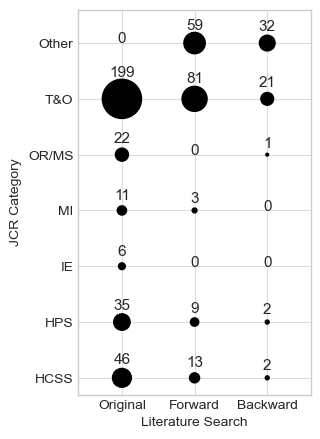

In [20]:
# Create a bubble plot of the cross-analysis of the Scopus Search category vs. the JCR Category
x = ["Original", "Original", "Original", "Original", "Original", "Original", "Original", "Forward", "Forward", "Forward", "Forward", "Forward", "Forward", "Forward", "Backward", "Backward", "Backward", "Backward", "Backward", "Backward", "Backward"]
y = ["HCSS", "HPS", "IE", "MI", "OR/MS", "T&O", "Other", "HCSS", "HPS", "IE", "MI", "OR/MS", "T&O", "Other", "HCSS", "HPS", "IE", "MI", "OR/MS", "T&O", "Other"]
s = [46, 35, 6, 11, 22, 199, 0, 13, 9, 0, 3, 0, 81, 59, 2, 2, 0, 0, 1, 21, 32]
s2 = [4*n for n in s]
fig, ax = plt.subplots(1, figsize=(3, 5))
ax.scatter(x, y, s=s2, color='black', zorder=1)
plt.grid(color='gainsboro', axis='both')
plt.annotate(s[0], ("Original", "HCSS"), textcoords="offset points", xytext=(0,0+10), ha='center', fontsize=11)
plt.annotate(s[1], ("Original", "HPS"), textcoords="offset points", xytext=(0,0+9), ha='center', fontsize=11)
plt.annotate(s[2], ("Original", "IE"), textcoords="offset points", xytext=(0,0+8), ha='center', fontsize=11)
plt.annotate(s[3], ("Original", "MI"), textcoords="offset points", xytext=(0,0+8), ha='center', fontsize=11)
plt.annotate(s[4], ("Original", "OR/MS"), textcoords="offset points", xytext=(0,0+9), ha='center', fontsize=11)
plt.annotate(s[5], ("Original", "T&O"), textcoords="offset points", xytext=(0,0+16), ha='center', fontsize=11)
plt.annotate(s[6], ("Original", "Other"), textcoords="offset points", xytext=(0,0+0), ha='center', fontsize=11)
plt.annotate(s[7], ("Forward", "HCSS"), textcoords="offset points", xytext=(0,0+8), ha='center', fontsize=11)
plt.annotate(s[8], ("Forward", "HPS"), textcoords="offset points", xytext=(0,0+7), ha='center', fontsize=11)
plt.annotate(s[9], ("Forward", "IE"), textcoords="offset points", xytext=(0,0), ha='center', fontsize=11)
plt.annotate(s[10], ("Forward", "MI"), textcoords="offset points", xytext=(0,0+6), ha='center', fontsize=11)
plt.annotate(s[11], ("Forward", "OR/MS"), textcoords="offset points", xytext=(0,0), ha='center', fontsize=11)
plt.annotate(s[12], ("Forward", "T&O"), textcoords="offset points", xytext=(0,0+12), ha='center', fontsize=11)
plt.annotate(s[13], ("Forward", "Other"), textcoords="offset points", xytext=(0,0+10), ha='center', fontsize=11)
plt.annotate(s[14], ("Backward", "HCSS"), textcoords="offset points", xytext=(0,0+6), ha='center', fontsize=11)
plt.annotate(s[15], ("Backward", "HPS"), textcoords="offset points", xytext=(0,0+6), ha='center', fontsize=11)
plt.annotate(s[16], ("Backward", "IE"), textcoords="offset points", xytext=(0,0), ha='center', fontsize=11)
plt.annotate(s[17], ("Backward", "MI"), textcoords="offset points", xytext=(0,0), ha='center', fontsize=11)
plt.annotate(s[18], ("Backward", "OR/MS"), textcoords="offset points", xytext=(0,0+5), ha='center', fontsize=11)
plt.annotate(s[19], ("Backward", "T&O"), textcoords="offset points", xytext=(0,0+9), ha='center', fontsize=11)
plt.annotate(s[20], ("Backward", "Other"), textcoords="offset points", xytext=(0,0+9), ha='center', fontsize=11)
lims = ax.get_xlim()
ax.set_xlim(lims[0] - 0.5, lims[1] + 0.5)
ax.grid(zorder=0)
lims2 = ax.get_ylim()
ax.set_ylim(lims2[0], lims2[1] + 0.3)
plt.xlabel('Literature Search')
plt.ylabel('JCR Category')
plt.savefig("plots/JCR_Scopus2.pdf", transparent=True, bbox_inches='tight')
plt.show()


### Article Type

In [21]:
paper_type_labels = ['Article', 'Conference Paper'] # Labels for the figures for the paper type classifications

paper_type = literature_analysis(review_analysis, paper_type_categories)
paper_type

[463, 29]

Text(0, 0.5, 'Number of Papers')

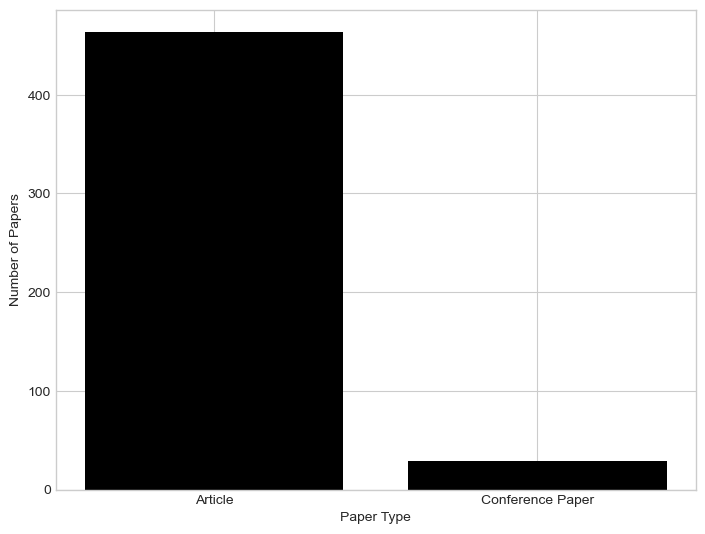

In [22]:
# Bar chart for the paper type classification
fig = plt.figure()
paper_type_plot = fig.add_axes([0,0,1,1])
paper_type_plot.bar(paper_type_labels, paper_type, color='black')
plt.xlabel('Paper Type')
plt.ylabel('Number of Papers')

### Collection Method

In [23]:
collection_method_labels = ['Data driven', 'Collaboration'] # Labels for the figures for the collection method classification

collection_method = literature_analysis(review_analysis, collection_method_categories)
collection_method

[481, 192]

Text(0, 0.5, 'Number of Papers')

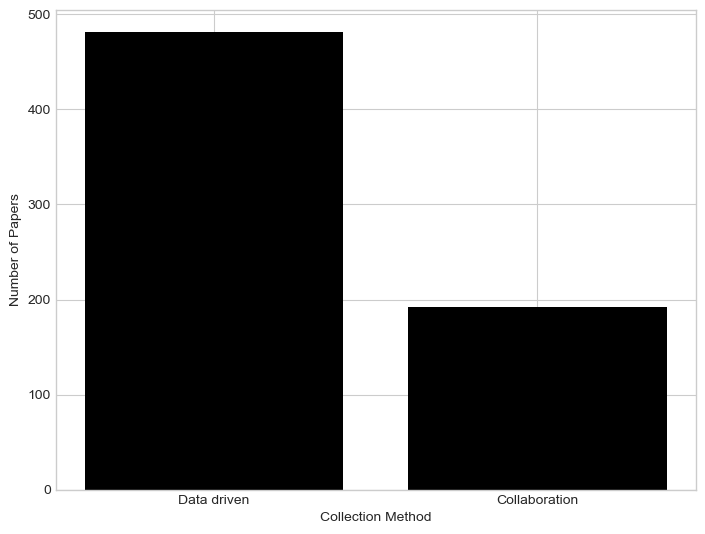

In [24]:
# Bar chart for the collection method classification
fig = plt.figure()
collection_method_plot = fig.add_axes([0,0,1,1])
collection_method_plot.bar(collection_method_labels, collection_method, color='black')
plt.xlabel('Collection Method')
plt.ylabel('Number of Papers')

### Data Source

In [25]:
data_source_labels = ['Primary', 'Secondary', 'Expert Opinion'] # Labels for figures for the data source classifications

data_source = literature_analysis(review_analysis, data_source_categories)
data_source

[155, 467, 99]

In [26]:
percentage(data_source)

[31.50406504065041, 94.91869918699187, 20.121951219512198]

In [27]:
# Calculate the overlaps of classifications for the data source category
data_source_by_class = []
data_source_by_class.append(len(review_analysis[review_analysis[['Primary_Data','Secondary_Data', 'Expert_Opinion']].apply(tuple,axis=1)==(1, 0, 0)]))
data_source_by_class.append(len(review_analysis[review_analysis[['Primary_Data','Secondary_Data', 'Expert_Opinion']].apply(tuple,axis=1)==(0, 1, 0)]))
data_source_by_class.append(len(review_analysis[review_analysis[['Primary_Data','Secondary_Data', 'Expert_Opinion']].apply(tuple,axis=1)==(1, 1, 0)]))
data_source_by_class.append(len(review_analysis[review_analysis[['Primary_Data','Secondary_Data', 'Expert_Opinion']].apply(tuple,axis=1)==(0, 0, 1)]))
data_source_by_class.append(len(review_analysis[review_analysis[['Primary_Data','Secondary_Data', 'Expert_Opinion']].apply(tuple,axis=1)==(1, 0, 1)]))
data_source_by_class.append(len(review_analysis[review_analysis[['Primary_Data','Secondary_Data', 'Expert_Opinion']].apply(tuple,axis=1)==(0, 1, 1)]))
data_source_by_class.append(len(review_analysis[review_analysis[['Primary_Data','Secondary_Data', 'Expert_Opinion']].apply(tuple,axis=1)==(1, 1, 1)]))
data_source_by_class

[24, 248, 121, 0, 1, 89, 9]

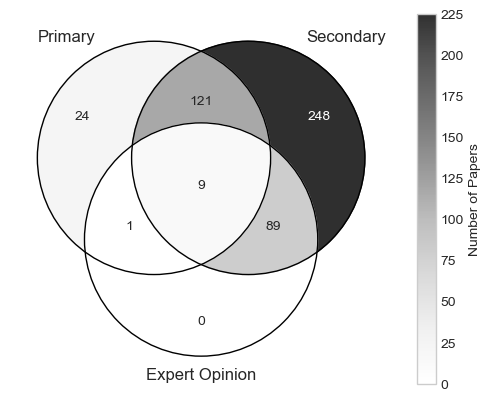

In [28]:
# Plot a venn-diagram for the data source category
v = venn3(subsets = (1, 1, 1, 1, 1, 1, 1), set_labels = ('Primary', 'Secondary', 'Expert Opinion'),alpha = 1)

list_integers = (22, 216, 113, 0, 1, 77, 13) 
cmap = cm.Greys(np.array(list_integers))

list_integers2 = range(0, 216)
cmap2 = cm.Greys(np.array(list_integers2))

all_cells = ("100", "010", "110", "001", "101", "011", "111")
all_texts = ("24", "248", "121", "0", "1", "89", "9")
all_colours = (0, 1, 2, 3, 4, 5, 6)

for cell, text, colour in zip(all_cells, all_texts, all_colours):
    v.get_label_by_id(cell).set_text(text)
    v.get_patch_by_id(cell).set_color(cmap[colour])
    
v.get_label_by_id("010").set_color('white')
    
venn3_circles(subsets = (1, 1, 1, 1, 1, 1, 1), linewidth=1)

my_cmap = mcolors.ListedColormap(cmap2, name='my_colormap')
norm = mpl.colors.Normalize(vmin=0, vmax=225)
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
plt.colorbar(sm, ticks=[0, 25, 50, 75, 100, 125, 150, 175, 200, 225], label='Number of Papers')#, alpha=0.5)#, ticks=np.arange(0,216))
plt.savefig('plots/data_source.pdf', transparent=True)

### Level of Implementation

In [29]:
implementation_labels = ['Theoretical', 'Conceptualised', 'Implemented'] # Labels for the figures for the level of implementation
level_of_implementation = literature_analysis(review_analysis, level_of_implementation_categories)
level_of_implementation

[324, 148, 21]

In [30]:
percentage(level_of_implementation)

[65.85365853658537, 30.081300813008134, 4.2682926829268295]

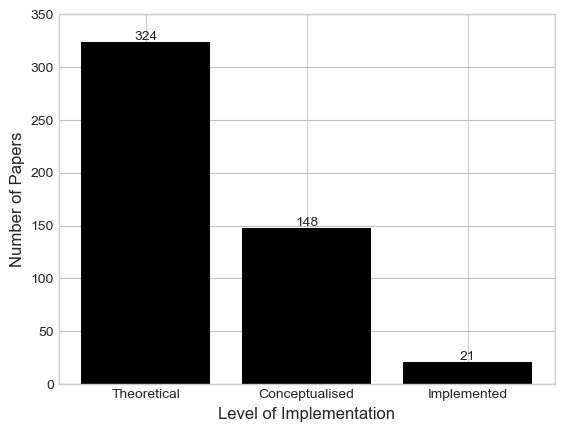

In [31]:
# Bar chart for the level of implementation classifications
fig = plt.figure()
plt.ylim([0,350])
plt.bar(implementation_labels, level_of_implementation, color='black')
plt.xlabel('Level of Implementation', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.grid(color='silver', axis='y')
add_labels(level_of_implementation, level_of_implementation) 
plt.savefig('plots/implementationLevel.pdf', transparent=True)

In [32]:
# Cross-analysis of the data source category vs. the level of implementation
data_source_implementation = cross_analysis(review_analysis, data_source_categories, data_source_labels, level_of_implementation_categories, implementation_labels)
data_source_implementation

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


,Theoretical,Conceptualised,Implemented
Primary,0.0,138.0,18.0
Secondary,324.0,127.0,17.0
Expert Opinion,87.0,12.0,0.0


### Continent of Application

In [33]:
# Labels for the figures of the continents classifications
continent_labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'Unknown']
continent_labels2 = ['Europe', 'Unknown', 'North America', 'Asia', 'Oceania', 'Africa', 'South America']
continent_labels3 = ['North America', 'Europe', 'Asia', 'Oceania', 'Africa', 'South America']
 
continent = literature_analysis(review_analysis, continent_categories)
continent2 = continent.copy()
continent2.pop() # Remove the unknown classification
continent2

[6, 21, 115, 276, 13, 7]

In [34]:
continent2.sort(reverse=True) # Sort the results from largest to smallest

In [35]:
percentage(continent)

[1.2195121951219512,
 4.2682926829268295,
 23.3739837398374,
 56.09756097560976,
 2.642276422764228,
 1.4227642276422763,
 10.975609756097562]

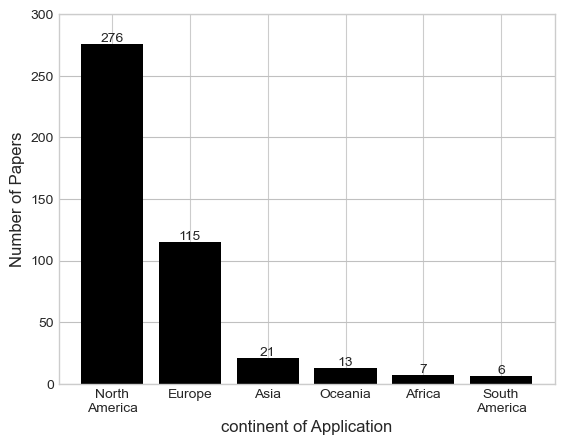

In [36]:
# Bar chart for the results of the continent classification
fig = plt.figure()
plt.ylim([0,300])
plt.bar(continent_labels3, continent2, color='black')
xlabels_new = [label.replace(' ', '\n') for label in continent_labels3]
plt.xlabel('continent of Application', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.grid(color='silver', axis='y')
add_labels(continent2, continent2)
plt.xticks(range(len(continent2)), xlabels_new)
plt.savefig("plots/continent.pdf", transparent=True, bbox_inches='tight')

### Funding Status

In [37]:
funding_labels = ['Academia', 'Authorities', 'Commerce', 'Grants', 'Health Services', 'No Mention', 'No funding']

funding = literature_analysis(review_analysis, funding_categories)
funding

[18, 60, 101, 86, 14, 108, 149]

In [38]:
funding_labels3 = ['No Mention', 'No funding', 'Funded'] # Labels for the figures of the funding category
funding3 = [108, 149, 235] 

In [39]:
percentage(funding3)

[21.951219512195124, 30.284552845528456, 47.764227642276424]

In [40]:
funding2 = funding.copy()
funding2.sort()

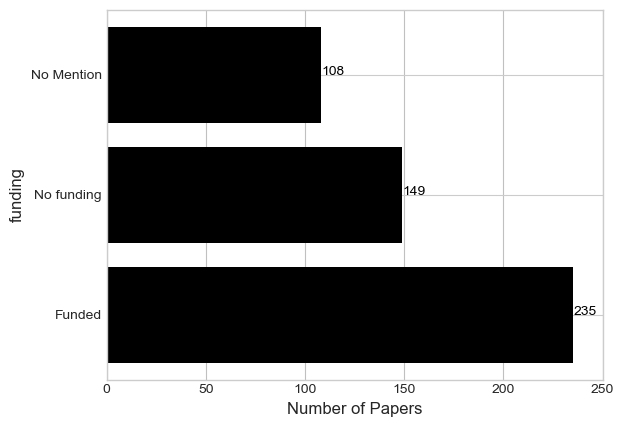

In [41]:
# Bar chart of the results of the funding category
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()

plt.xlim([0, 250])

y_pos = np.arange(len(funding_labels3))

ax.barh(funding_labels3, funding3, align='center', color='black')
ax.set_yticks(y_pos)
ax.invert_yaxis()  
ax.set_xlabel('Number of Papers', fontsize=12)
ax.set_ylabel('funding', fontsize=12)
plt.grid(color='silver', axis='x')
for i, v in enumerate(funding3):
    ax.text(v + 0.2, i, str(v), color='black')
plt.savefig('plots/Funded.pdf', transparent=True, bbox_inches='tight')

## Medical Context

### Trauma & Orthopaedics (T&O) Specialty 

In [42]:
# Labels for the figures for the T&O subdiscipline category
t_and_o_area_labels = ['Fracture', 'Sport', 'Spine', 'Paediatrics', 'Shoulder', 'Elbow', 'Hands', 'Foot & Ankle', 'Knee', 'Hip', 'General']
t_and_o_area_labels2 = ['Elbow', 'Paediatrics', 'Hands', 'Sport', 'Shoulder', 'General', 'Fracture', 'Foot & Ankle', 'Spine', 'Hip', 'Knee']

t_and_o_area = literature_analysis(review_analysis, t_and_o_area_categories)
t_and_o_area

[64, 27, 72, 9, 37, 2, 18, 54, 176, 154, 41]

In [43]:
percentage(t_and_o_area)

[13.008130081300814,
 5.487804878048781,
 14.634146341463413,
 1.8292682926829267,
 7.520325203252034,
 0.40650406504065045,
 3.6585365853658534,
 10.975609756097562,
 35.77235772357724,
 31.300813008130078,
 8.333333333333332]

In [44]:
t_and_o_area.sort() # Sort the results from smallest to largest

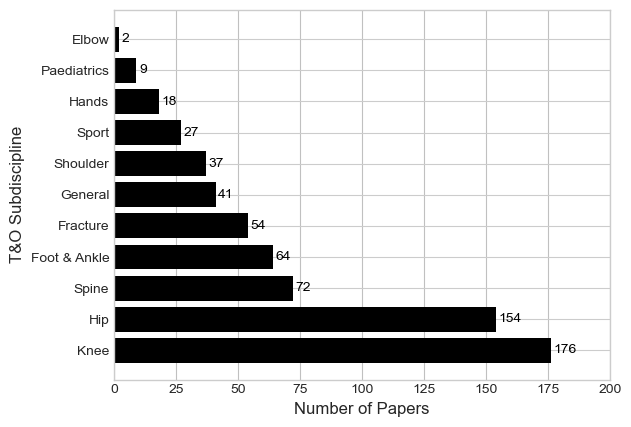

In [45]:
# Plot bar chart of the results of the T&O subdisciplines category
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
plt.xlim([0, 200])

y_pos = np.arange(len(t_and_o_area_labels))

ax.barh(t_and_o_area_labels2, t_and_o_area, align='center', color='black')
ax.set_yticks(y_pos)
ax.invert_yaxis() 
plt.grid(color='silver', axis='x')
ax.set_xlabel('Number of Papers', fontsize=12)
ax.set_ylabel('T&O Subdiscipline', fontsize=12)
for i, v in enumerate(t_and_o_area):
    ax.text(v + 1, i+.1, str(v), color='black')
plt.savefig('plots/t_and_o_area.pdf', transparent=True, bbox_inches='tight')

### Condition Area

In [46]:
condition_area_labels = ['Acute', 'Chronic', 'Surgical'] # Labels for figures of the condition area category
 
condition_area = literature_analysis(review_analysis, condition_area_categories)
condition_area

[394, 449, 442]

In [47]:
# Calculate the overlaps of classifications for the condition area category
condition_area_by_class = []
condition_area_by_class.append(len(review_analysis[review_analysis[['Acute', 'Chronic', 'CA_Surgical']].apply(tuple,axis=1)==(1, 0, 0)]))
condition_area_by_class.append(len(review_analysis[review_analysis[['Acute', 'Chronic', 'CA_Surgical']].apply(tuple,axis=1)==(0, 1, 0)]))
condition_area_by_class.append(len(review_analysis[review_analysis[['Acute', 'Chronic', 'CA_Surgical']].apply(tuple,axis=1)==(1, 1, 0)]))
condition_area_by_class.append(len(review_analysis[review_analysis[['Acute', 'Chronic', 'CA_Surgical']].apply(tuple,axis=1)==(0, 0, 1)]))
condition_area_by_class.append(len(review_analysis[review_analysis[['Acute', 'Chronic', 'CA_Surgical']].apply(tuple,axis=1)==(1, 0, 1)]))
condition_area_by_class.append(len(review_analysis[review_analysis[['Acute', 'Chronic', 'CA_Surgical']].apply(tuple,axis=1)==(0, 1, 1)]))
condition_area_by_class.append(len(review_analysis[review_analysis[['Acute', 'Chronic', 'CA_Surgical']].apply(tuple,axis=1)==(1, 1, 1)]))
condition_area_by_class

[1, 13, 36, 24, 18, 61, 339]

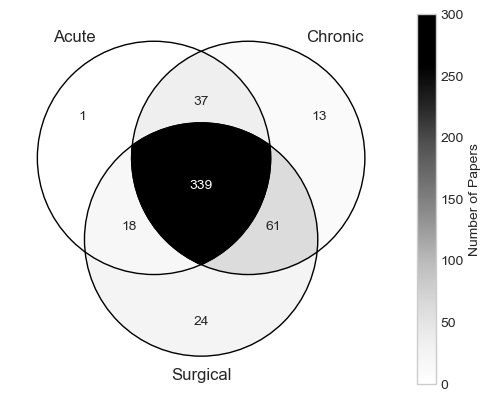

In [48]:
# Plot a venn-diagram of the results of the condition area category
v = venn3(subsets = (1, 1, 1, 1, 1, 1, 1), set_labels = ('Acute', 'Chronic', 'Surgical'), alpha = 1)

list_integers = (1, 10, 33, 24, 18, 59, 297)
cmap = cm.Greys(np.array(list_integers))

list_integers2 = range(0, 297)
cmap2 = cm.Greys(np.array(list_integers2))

all_cells = ("100", "010", "110", "001", "101", "011", "111")
all_texts = ("1", "13", "37", "24", "18", "61", "339")
all_colours = (0, 1, 2, 3, 4, 5, 6)

for cell, text, colour in zip(all_cells, all_texts, all_colours):
    v.get_label_by_id(cell).set_text(text)
    v.get_patch_by_id(cell).set_color(cmap[colour])
    
v.get_label_by_id("111").set_color('white')
    
venn3_circles(subsets = (1, 1, 1, 1, 1, 1, 1), linewidth=1)

my_cmap = mcolors.ListedColormap(cmap2, name='my_colormap') 
norm = mpl.colors.Normalize(vmin=0, vmax=300)
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
plt.colorbar(sm, label='Number of Papers')

### Care Area

In [49]:
care_area_labels = ['Primary', 'Secondary', 'Tertiary', 'Community', 'Patient Progression', 'No Care Area'] # Labels for the figures of the care area category

care_area = literature_analysis(review_analysis, care_area_categories)
care_area

[18, 445, 75, 47, 304, 1]

In [50]:
percentage(care_area)

[3.6585365853658534,
 90.4471544715447,
 15.24390243902439,
 9.552845528455284,
 61.78861788617886,
 0.20325203252032523]

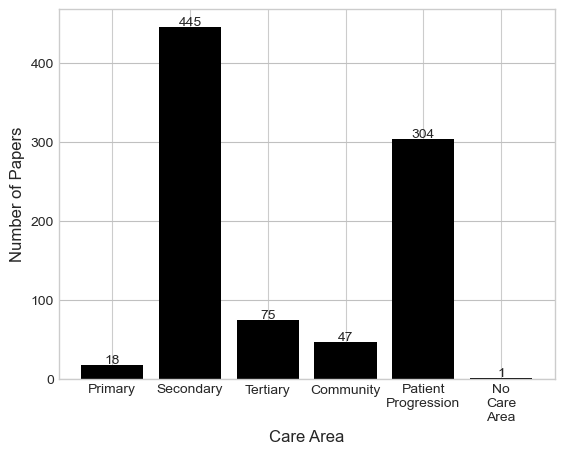

In [51]:
# Bar chart for the results of the care area category
fig = plt.figure()
plt.grid(color='silver', axis='y')
plt.bar(care_area_labels, care_area, color='black')
plt.xlabel('Care Area', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
xlabels_new = [label.replace(' ', '\n') for label in care_area_labels]
add_labels(care_area, care_area)
plt.xticks(range(len(care_area)), xlabels_new)
plt.savefig('plots/care_area.pdf', transparent=True, bbox_inches='tight')

In [52]:
# Cross-analysis of care area vs. care area
care_area_care_area = cross_analysis(review_analysis, care_area_categories, care_area_labels)
care_area_care_area2 = care_area_care_area.copy()
for i in range(len(care_area_care_area)):
    care_area_care_area.iloc[i,i] = np.nan
for i in range(len(care_area_care_area)):
    for j in range(i, len(care_area_care_area)):
        care_area_care_area.iloc[i,j] = np.nan
care_area_care_area

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


,Primary,Secondary,Tertiary,Community,Patient Progression,No Care Area
Primary,NaN,NaN,NaN,NaN,NaN,NaN
Secondary,17.0,NaN,NaN,NaN,NaN,NaN
Tertiary,3.0,31.0,NaN,NaN,NaN,NaN
Community,4.0,43.0,10.0,NaN,NaN,NaN
Patient Progression,11.0,273.0,54.0,36.0,NaN,NaN
No Care Area,0.0,0.0,0.0,0.0,0.0,NaN


### Modelling Scope

In [53]:
scope_labels = ['Clinical', 'Hospital', 'Department'] # Labels for the figures for the scope category

scope = literature_analysis(review_analysis, scope_categories)
scope

[456, 29, 7]

In [54]:
percentage(scope)

[92.6829268292683, 5.894308943089431, 1.4227642276422763]

In [55]:
# Sorted in order of size of the scope
scope2 = [456, 7, 29]
scope_labels2 = ['Clinical', 'Department', 'Hospital']

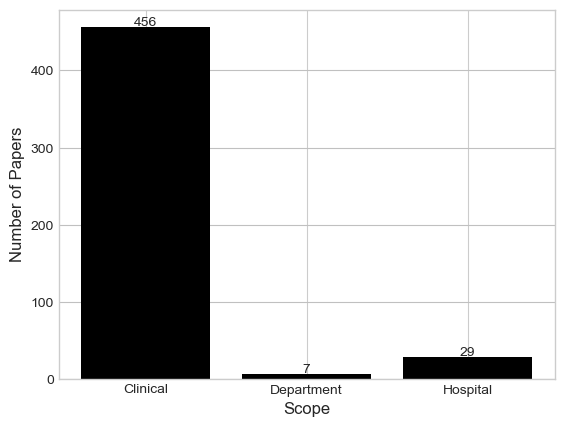

In [56]:
# Bar chart for the results of the scope classifications
fig = plt.figure()
plt.style.use('seaborn-whitegrid')
plt.grid(color='silver', axis='y')
add_labels(scope2, scope2)
plt.bar(scope_labels2, scope2, color='black')
plt.xlabel('Scope', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.savefig('plots/scope.pdf', transparent=True, bbox_inches='tight')

### Secondary and Tertiary Care Area/Pathway

In [57]:
# Labels for the figures for the secondary/tertiary care pathway classifications
pathway_labels = ['Patient Assessment', 'Outpatients', 'Inpatients', 'Surgery', 'Post-Surgery', 'Rehabilitation', 'Follow-up']
 
pathway = literature_analysis(review_analysis, pathway_categories)
pathway

[18, 156, 22, 421, 315, 97, 59]

In [58]:
percentage(pathway)

[3.6585365853658534,
 31.70731707317073,
 4.471544715447155,
 85.56910569105692,
 64.02439024390245,
 19.715447154471544,
 11.991869918699187]

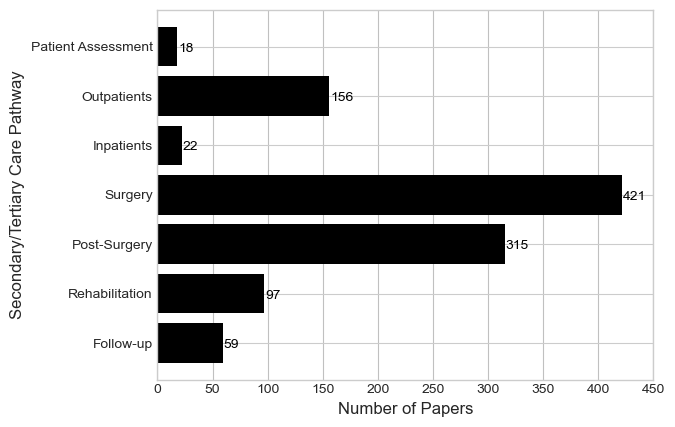

In [59]:
# Bar chart for the results of the secondary/tertiary care pathway classifications
fig, ax = plt.subplots()
plt.xlim([0,450])
plt.grid(color='silver', axis='x')
y_pos = np.arange(len(pathway_labels))

ax.barh(pathway_labels, pathway, align='center', color='Black')

ax.set_yticks(y_pos)#, labels=funding_labels) 
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Papers', fontsize=12)
ax.set_ylabel('Secondary/Tertiary Care Pathway', fontsize=12)
for i, v in enumerate(pathway):
    ax.text(v + 1, i+.1, str(v), color='black')
plt.savefig('plots/SecondaryArea.pdf', transparent=True, bbox_inches='tight')

In [60]:
# Gather the total number of pathway areas modelled by each paper
pathwayTotals = []
for i in range(len(review_analysis)):
    count = 0
    for j in range(90, 97):
        count = count + review_analysis.iloc[i,j]
    pathwayTotals.append(count)

In [61]:
# Gather the frequency of papers for each number of pathway areas modelled
pathwayTotals2 = []
for i in range(max(pathwayTotals)+1): pathwayTotals2.append(pathwayTotals.count(i))
pathwayTotals2

[4, 112, 217, 104, 47, 7, 0, 1]

In [62]:
pathwayTotals3 = pathwayTotals2.copy()

In [63]:
pathwayTotals.index(7)

34

In [64]:
pathwayTotals4 = pathwayTotals.copy()

In [65]:
pathwayTotals4[34] = 6

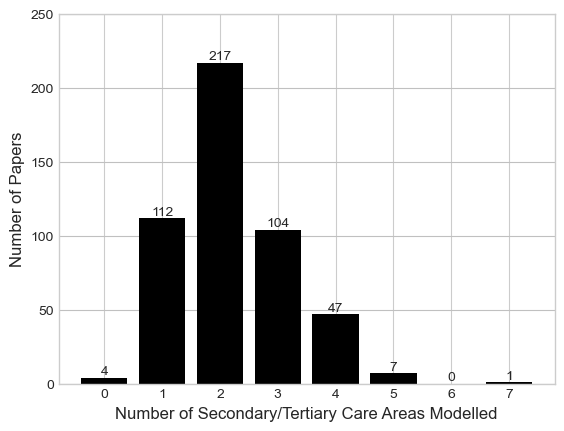

In [66]:
# Bar chart for the number of papers for each number of secondary/tertiary care areas modelled
fig = plt.figure()
plt.ylim([0,250])
plt.grid(color='silver', axis='y')
add_labels(pathwayTotals3, pathwayTotals3)
pathway_labels2 = ['0', '1', '2', '3', '4', '5', '6', '7']
plt.bar(pathway_labels2, pathwayTotals3, color='Black')
plt.xlabel('Number of Secondary/Tertiary Care Areas Modelled', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.savefig("plots/pathwayAreas.pdf", transparent=True, bbox_inches='tight')

### Care Areas + Secondary/Tertiary pathway

In [67]:
# Labels for figures of combined care areas and secondary/tertiary care pathway areas
care_area_labels2 = ['Primary', 'Patient Assessment', 'Outpatients', 'Inpatients', 'Surgery', 'Post-Surgery', 'Rehabilitation', 'Follow-up', 'Community', 'Patient Progression', 'No Care Area']
care_area2 = [18, 18, 156, 23, 421, 315, 97, 59, 47, 304, 1]

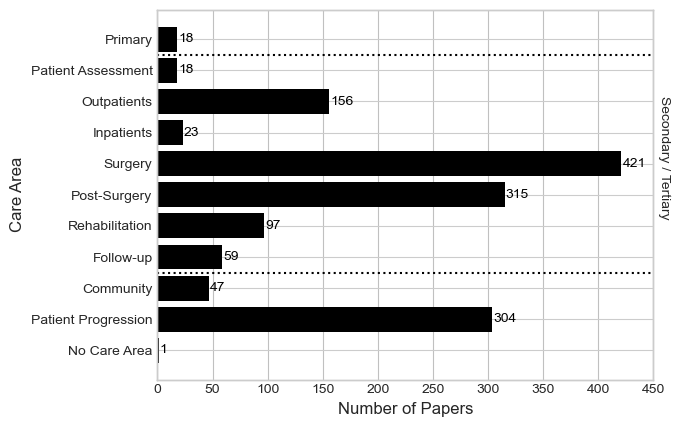

In [68]:
# Bar plot for the results of combined care areas and secondary/tertiary care pathway areas
fig, ax = plt.subplots()
plt.xlim([0,450])
plt.grid(color='silver', axis='x')
y_pos = np.arange(len(care_area_labels2))

ax.barh(care_area_labels2, care_area2, align='center', color='Black')

ax.set_yticks(y_pos)
ax.invert_yaxis()
ax.set_xlabel('Number of Papers', fontsize=12)
ax.set_ylabel('Care Area', fontsize=12)
for i, v in enumerate(care_area2):
    ax.text(v + 1, i+.1, str(v), color='black')
ax.plot([0, 450], [0.5, 0.5], color='black', linestyle='dotted')
ax.plot([0, 450], [7.5, 7.5], color='black', linestyle='dotted')
ax2 = ax.twinx()
ax2.set_yticks([0, 0.6, 1.0])
ax2.set_yticklabels(['', 'Secondary / Tertiary', ''], rotation=270, va='center')
ax2.grid(False)
plt.savefig('plots/care_area2.pdf', transparent=True, bbox_inches='tight')

### Modelling Perspective

In [69]:
perspective_labels = ['Patient', 'Provider', 'Societal'] #  Labels for figures for the model perspective category

perspective = literature_analysis(review_analysis, perspective_categories)
perspective

[166, 382, 114]

In [70]:
percentage(perspective)

[33.739837398373986, 77.64227642276423, 23.170731707317074]

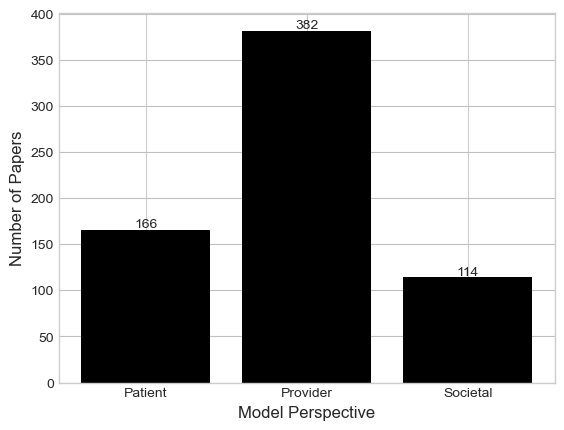

In [71]:
# Bar chart for the results of the model perspective classification
fig = plt.figure()
plt.style.use('seaborn-whitegrid')
plt.grid(color='silver', axis='y')
add_labels(perspective, perspective)
plt.bar(perspective_labels, perspective, color='black')
plt.xlabel('Model Perspective', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.savefig("plots/perspective.pdf", transparent=True, bbox_inches='tight')

In [72]:
# Calculate the overlaps of classifications for the model perspective category
model_perspective_by_class = []
model_perspective_by_class.append(len(review_analysis[review_analysis[['Patient', 'Provider', 'Societal']].apply(tuple,axis=1)==(1, 0, 0)]))
model_perspective_by_class.append(len(review_analysis[review_analysis[['Patient', 'Provider', 'Societal']].apply(tuple,axis=1)==(0, 1, 0)]))
model_perspective_by_class.append(len(review_analysis[review_analysis[['Patient', 'Provider', 'Societal']].apply(tuple,axis=1)==(1, 1, 0)]))
model_perspective_by_class.append(len(review_analysis[review_analysis[['Patient', 'Provider', 'Societal']].apply(tuple,axis=1)==(0, 0, 1)]))
model_perspective_by_class.append(len(review_analysis[review_analysis[['Patient', 'Provider', 'Societal']].apply(tuple,axis=1)==(1, 0, 1)]))
model_perspective_by_class.append(len(review_analysis[review_analysis[['Patient', 'Provider', 'Societal']].apply(tuple,axis=1)==(0, 1, 1)]))
model_perspective_by_class.append(len(review_analysis[review_analysis[['Patient', 'Provider', 'Societal']].apply(tuple,axis=1)==(1, 1, 1)]))
model_perspective_by_class

[45, 234, 99, 62, 3, 30, 19]

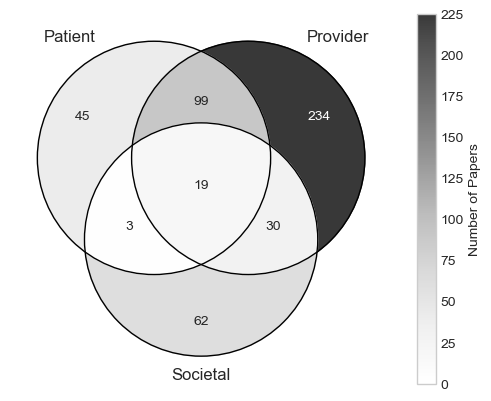

In [73]:
# Plot a venn-diagram for the model perspective category
v = venn3(subsets = (1, 1, 1, 1, 1, 1, 1), set_labels = ('Patient', 'Provider', 'Societal'), alpha = 1)

list_integers = (38, 210, 84, 57, 3, 28, 18)
cmap = cm.Greys(np.array(list_integers))

list_integers2 = range(0, 210)
cmap2 = cm.Greys(np.array(list_integers2))

all_cells = ("100", "010", "110", "001", "101", "011", "111")
all_texts = ("45", "234", "99", "62", "3", "30", "19")
all_colours = (0, 1, 2, 3, 4, 5, 6)

for cell, text, colour in zip(all_cells, all_texts, all_colours):
    v.get_label_by_id(cell).set_text(text)
    v.get_patch_by_id(cell).set_color(cmap[colour])
    
v.get_label_by_id("010").set_color('white')
    
venn3_circles(subsets = (1, 1, 1, 1, 1, 1, 1), linewidth=1)

my_cmap = mcolors.ListedColormap(cmap2, name='my_colormap') 
norm = mpl.colors.Normalize(vmin=0, vmax=225)
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
plt.colorbar(sm, ticks=[0, 25, 50, 75, 100, 125, 150, 175, 200, 225], label='Number of Papers')
plt.savefig("plots/perspective.pdf", transparent=True, bbox_inches='tight')

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


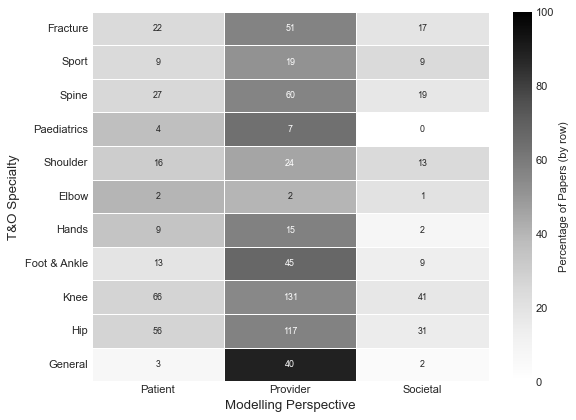

In [74]:
# Cross analysis of T&O subdiscipline vs Model perspective
t_and_o_perspective = cross_analysis(review_analysis, t_and_o_area_categories, t_and_o_area_labels, perspective_categories, perspective_labels)

t_and_o_perspective_labels = t_and_o_perspective.to_numpy() # For custom labels for heatmap

# Plot a normalised heatmap of the cross-analysis
normalised_heat_map(t_and_o_perspective, colourmap='Greys', annotate=t_and_o_perspective_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.xlabel('Modelling Perspective', fontsize=12)
plt.ylabel('T&O Specialty', fontsize=12)
plt.savefig("plots/t_and_o_perspective.pdf", transparent=True, bbox_inches='tight')

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(61.61979166666667, 0.5, 'Care Area')

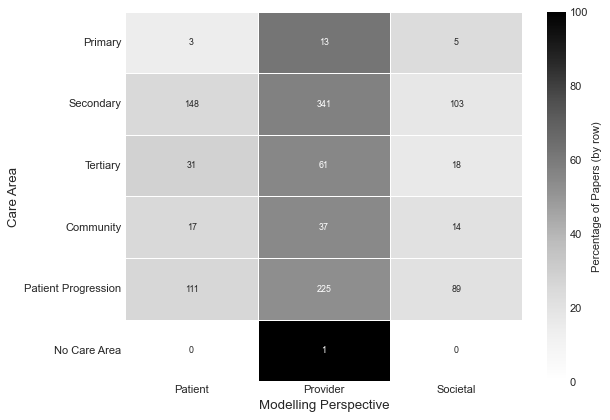

In [75]:
# Cross-analysis of care area vs model perspective
care_area_perspective = cross_analysis(review_analysis, care_area_categories, care_area_labels, perspective_categories, perspective_labels)
care_area_perspective_labels = care_area_perspective.to_numpy() # For custom labels of heatmap

# Plot a normalised heatmap of the cross-analysis
normalised_heat_map(care_area_perspective, colourmap='Greys', annotate=care_area_perspective_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.xlabel('Modelling Perspective', fontsize=12)
plt.ylabel('Care Area', fontsize=12)

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(61.66666666666667, 0.5, 'Modelling Perspective')

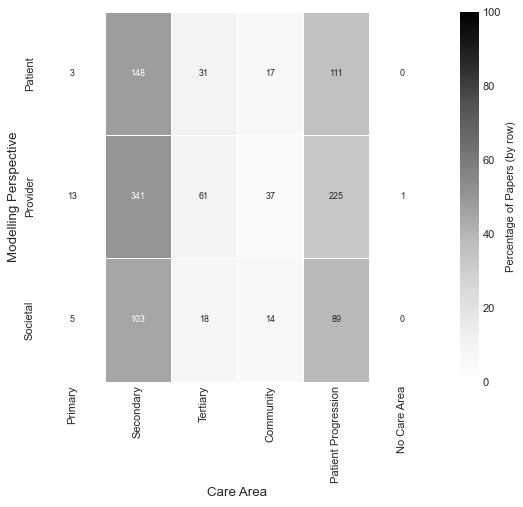

In [76]:
# Cross-analysis of model perspective vs care area
perspective_care_area = cross_analysis(review_analysis, perspective_categories, perspective_labels, care_area_categories, care_area_labels)
perspective_care_area_labels = perspective_care_area.to_numpy() # For custom labels of heatmap

# Plot a normalised heatmap of the cross-analysis
normalised_heat_map(perspective_care_area, colourmap='Greys', annotate=perspective_care_area_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.xlabel('Care Area', fontsize=12)
plt.ylabel('Modelling Perspective', fontsize=12)

### Research Aims

In [77]:
research_aims_labels = ['Evaluating', 'Forecasting', 'Improving'] # Labels for figures for research aims category

research_aims = literature_analysis(review_analysis, research_aims_categories)
research_aims

[451, 11, 104]

In [78]:
percentage(research_aims)

[91.66666666666666, 2.2357723577235773, 21.138211382113823]

In [79]:
# Calculate the overlaps of classifications for the research aims category
research_aims_by_class = []
research_aims_by_class.append(len(review_analysis[review_analysis[['Evaluating', 'Forecasting', 'Improving']].apply(tuple,axis=1)==(1, 0, 0)]))
research_aims_by_class.append(len(review_analysis[review_analysis[['Evaluating', 'Forecasting', 'Improving']].apply(tuple,axis=1)==(0, 1, 0)]))
research_aims_by_class.append(len(review_analysis[review_analysis[['Evaluating', 'Forecasting', 'Improving']].apply(tuple,axis=1)==(1, 1, 0)]))
research_aims_by_class.append(len(review_analysis[review_analysis[['Evaluating', 'Forecasting', 'Improving']].apply(tuple,axis=1)==(0, 0, 1)]))
research_aims_by_class.append(len(review_analysis[review_analysis[['Evaluating', 'Forecasting', 'Improving']].apply(tuple,axis=1)==(1, 0, 1)]))
research_aims_by_class.append(len(review_analysis[review_analysis[['Evaluating', 'Forecasting', 'Improving']].apply(tuple,axis=1)==(0, 1, 1)]))
research_aims_by_class.append(len(review_analysis[review_analysis[['Evaluating', 'Forecasting', 'Improving']].apply(tuple,axis=1)==(1, 1, 1)]))
research_aims_by_class

[373, 4, 1, 22, 76, 5, 1]

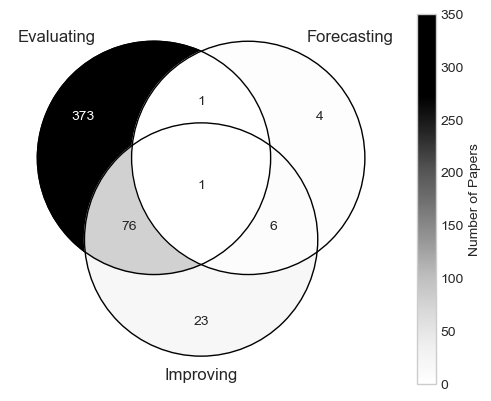

In [80]:
# Plot a venn-diagram for the research aims category
v = venn3(subsets = (1, 1, 1, 1, 1, 1, 1), set_labels = ('Evaluating', 'Forecasting', 'Improving'), alpha = 1)

list_integers = (329, 4, 1, 18, 73, 6, 1)
cmap = cm.Greys(np.array(list_integers))

list_integers2 = range(0, 329)
cmap2 = cm.Greys(np.array(list_integers2))

all_cells = ("100", "010", "110", "001", "101", "011", "111")
all_texts = ("373", "4", "1", "23", "76", "6", "1")
all_colours = (0, 1, 2, 3, 4, 5, 6)

for cell, text, colour in zip(all_cells, all_texts, all_colours):
    v.get_label_by_id(cell).set_text(text)
    v.get_patch_by_id(cell).set_color(cmap[colour])
    
v.get_label_by_id("100").set_color('white')
    
venn3_circles(subsets = (1, 1, 1, 1, 1, 1, 1), linewidth=1)

my_cmap = mcolors.ListedColormap(cmap2, name='my_colormap') 
norm = mpl.colors.Normalize(vmin=0, vmax=350)
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
plt.colorbar(sm, label='Number of Papers')
plt.savefig("plots/research_aims.pdf", transparent=True, bbox_inches='tight')

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(61.61979166666667, 0.5, 'Care Area')

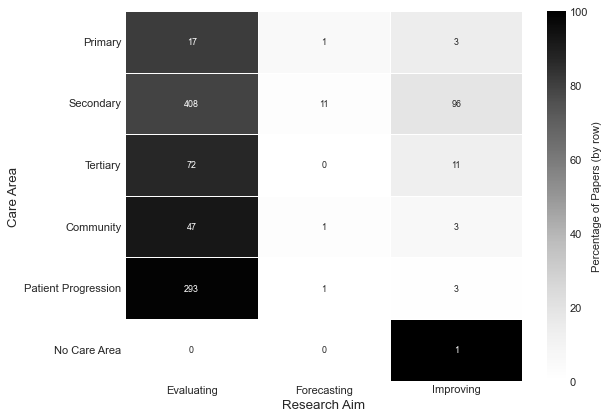

In [81]:
# Cross-analysis of research aims vs care area
research_aims_care_area = cross_analysis(review_analysis, care_area_categories, care_area_labels, research_aims_categories, research_aims_labels)
research_aims_care_area_labels = research_aims_care_area.to_numpy() # For custom labels for the heatmap

# Plot a normalised heatmap of the cross-analysis
normalised_heat_map(research_aims_care_area, annotate=research_aims_care_area_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.xlabel('Research Aim', fontsize=12)
plt.ylabel('Care Area', fontsize=12)

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(61.61979166666667, 0.5, 'Level of Implementation')

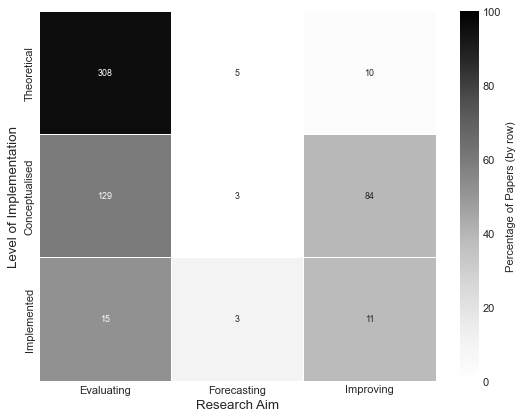

In [82]:
# Cross-analysis of research aims vs. model implementation
research_aims_implementation = cross_analysis(review_analysis, level_of_implementation_categories, implementation_labels, research_aims_categories, research_aims_labels)
research_aims_implementation_labels = research_aims_implementation.to_numpy() # For custom labels for the heatmap

# Plot a normalised heatmap of the cross-analysis
normalised_heat_map(research_aims_implementation, annotate=research_aims_implementation_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.xlabel('Research Aim', fontsize=12)
plt.ylabel('Level of Implementation', fontsize=12)

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


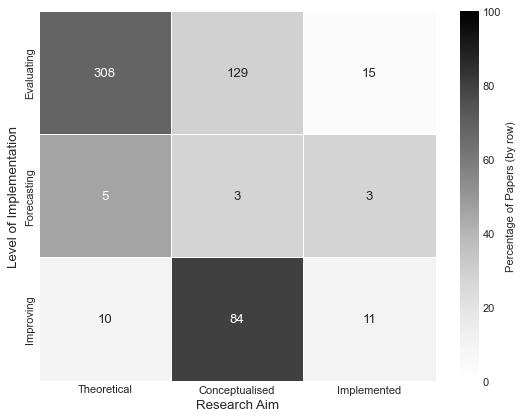

In [83]:
# Cross-analysis of research aims vs. level of implementation
research_aims_implementation = cross_analysis(review_analysis, research_aims_categories, research_aims_labels, level_of_implementation_categories, implementation_labels)
research_aims_implementation_labels = research_aims_implementation.to_numpy() # For custom labels for the heatmap

# Plot a normalised heatmap of the cross-analysis
normalised_heat_map(research_aims_implementation, annotate=research_aims_implementation_labels, cbar_kws={'label': 'Percentage of Papers (by row)'}, annotkws={"fontsize":12})
plt.xlabel('Research Aim', fontsize=12)
plt.ylabel('Level of Implementation', fontsize=12)
plt.savefig("plots/research_aims_implementation.pdf", transparent=True, bbox_inches='tight')

## Methodological Context

### Primary OR/MS Area

In [84]:
# Labels for figures for OR area category
or_area_labels = ['Decision Analysis', 'Graph Theory', 'Heuristics','Markov Model', 'MCDM', 'Optimisation', 'Queueing Theory', 'Simulation', 'Soft OR', 'Statistical Analysis']
or_area_labels2 = ['Graph Theory', 'Queueing Theory', 'Heuristics', 'MCDM', 'Optimisation', 'Statistical Analysis', 'Simulation', 'Soft OR', 'Decision Analysis', 'Markov Model']
or_area_labels3 = ['Markov Model', 'Decision Analysis', 'Soft OR', 'Simulation', 'Statistical Analysis', 'Optimisation', 'MCDM', 'Heuristics', 'Queueing Theory', 'Graph Theory']

or_area = literature_analysis(review_analysis, or_area_categories)
or_area2 = or_area.copy()
or_area

[206, 2, 3, 222, 5, 10, 3, 43, 62, 11]

In [85]:
or_area.sort() # Sort results from smallest to largest
or_area

[2, 3, 3, 5, 10, 11, 43, 62, 206, 222]

In [86]:
percentage(or_area)

[0.40650406504065045,
 0.6097560975609756,
 0.6097560975609756,
 1.0162601626016259,
 2.0325203252032518,
 2.2357723577235773,
 8.739837398373984,
 12.601626016260163,
 41.86991869918699,
 45.1219512195122]

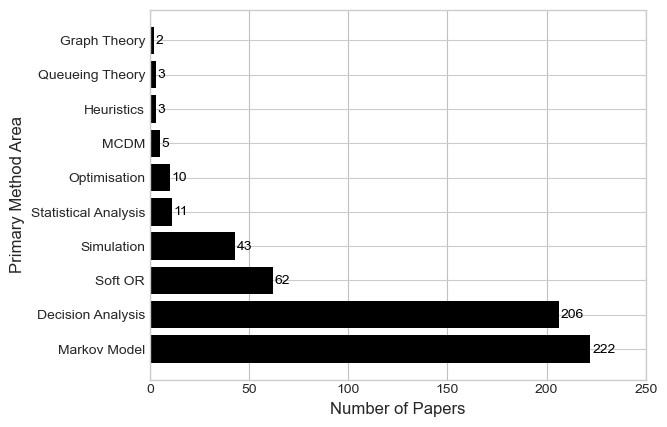

In [87]:
# Bar chart for the results of the OR Area classification
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
plt.xlim([0,250])
plt.grid(color='silver', axis='x')

y_pos = np.arange(len(or_area_labels))

ax.barh(or_area_labels2, or_area, align='center', color='black')
ax.set_yticks(y_pos)#, labels=funding_labels) 
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Papers', fontsize=12)
ax.set_ylabel('Primary Method Area', fontsize=12)
for i, v in enumerate(or_area):
    ax.text(v + 1, i+.1, str(v), color='black')
plt.savefig("plots/or_area.pdf", transparent=True, bbox_inches='tight')

In [88]:
# Number of OR Areas for each paper
or_area_Totals = []
col_list = ['Decision_Analysis', 'Graph_Theory', 'Heuristics', 'Markov_Model', 'MCDM', 'Optimisation', 'Queuing_Theory', 'Simulation', 'Soft_OR', 'Statistical']
or_areas_Totals = review_analysis[col_list].sum(axis=1)
or_areas_Totals = or_areas_Totals.tolist()

In [89]:
# Cross-analysis for OR Area vs OR Area
or_areas_or_areas = cross_analysis(review_analysis, or_area_categories, or_area_labels)

or_areas_or_areas5 = or_areas_or_areas.copy()
for i in range(len(or_areas_or_areas5)):
    or_areas_or_areas5.iloc[i,i] = np.nan
for i in range(len(or_areas_or_areas5)):
    for j in range(i, len(or_areas_or_areas5)):
        or_areas_or_areas5.iloc[i,j] = np.nan
or_areas_or_areas5

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


,Decision Analysis,Graph Theory,Heuristics,Markov Model,MCDM,Optimisation,Queueing Theory,Simulation,Soft OR,Statistical Analysis
Decision Analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Graph Theory,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heuristics,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Markov Model,63.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MCDM,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Optimisation,1.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Queueing Theory,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
Simulation,1.0,0.0,2.0,1.0,0.0,4.0,1.0,NaN,NaN,NaN
Soft OR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Statistical Analysis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [90]:
or_areas_or_areas_rowsums = or_areas_or_areas.sum(1)

In [91]:
# Cross-analysis of OR Area vs Number of secondary/tertiary pathway areas modelled
df = np.zeros((len(or_area2), len(pathway_labels2)))
m = 0
for i in range(104, 114):
    for k in range(len(review_analysis)):
        for j in range(len(pathway_labels2)):
            if review_analysis.iloc[k, i] == 1 and pathwayTotals[k] == j:
                df[m, j] = df[m, j] + 1
            #if review_analysis.iloc[k, i] == 1 and pathwayTotals[k] >= 6:
                #df[m, j] = df[m, j] + 1
    m = m + 1
df = pd.DataFrame(df)
df.columns = pathway_labels2
df.index = or_area_labels
or_area_ca = df.copy()
df

,0,1,2,3,4,5,6,7
Decision Analysis,0.0,28.0,104.0,53.0,17.0,4.0,0.0,0.0
Graph Theory,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Heuristics,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
Markov Model,2.0,15.0,100.0,65.0,35.0,5.0,0.0,0.0
MCDM,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
Optimisation,0.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0
Queueing Theory,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Simulation,1.0,23.0,12.0,5.0,2.0,0.0,0.0,0.0
Soft OR,1.0,42.0,17.0,1.0,0.0,0.0,0.0,1.0
Statistical Analysis,0.0,2.0,8.0,1.0,0.0,0.0,0.0,0.0


In [92]:
or_area_ca_rowsums = or_area_ca.sum(1)
or_area_ca2 = or_area_ca.copy()

for i in range(len(or_area_ca)):
    for j in range(len(or_area_ca.columns)):
        or_area_ca2.iloc[i,j] = or_area_ca.iloc[i,j]/or_area_ca_rowsums[i]
        
labels = or_area_ca.to_numpy()

In [93]:
# Number of secondary/tertiary care areas modelled for each paper
review_analysis['Number of Secondary Care Areas'] = review_analysis[['Patient_Assessment',
 'Outpatients',
 'Inpatients',
 'Pathway_Surgery',
 'Post_Surgery',
 'Rehab',
 'Follow_Up',
]].sum(axis=1)

In [94]:
list_of_primary_areas = ['Decision_Analysis', 'Graph_Theory', 'Heuristics', 'Markov_Model', 'MCDM', 'Optimisation', 'Queuing_Theory', 'Simulation', 'Soft_OR', 'Statistical',]

In [95]:
ordered_list_of_primary_areas = sorted(list_of_primary_areas, key=lambda x: review_analysis[review_analysis[x]==1]['Number of Secondary Care Areas'].mean())

In [96]:
np.random.seed(19680801)
data2 = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]
len(data2), len(data2[0])
np.percentile(data2, [25, 50, 75], axis=1)

array([[-6.62613800e-01, -1.32421006e+00, -1.33282218e+00,
        -3.03203139e+00],
       [-5.19491956e-04,  1.50855340e-02,  2.99302920e-01,
        -1.55510548e-01],
       [ 7.17098049e-01,  1.30451429e+00,  2.19869123e+00,
         3.05844213e+00]])

In [97]:
ordered_list_of_primary_areas

['Queuing_Theory',
 'Heuristics',
 'Optimisation',
 'Soft_OR',
 'Graph_Theory',
 'MCDM',
 'Simulation',
 'Statistical',
 'Decision_Analysis',
 'Markov_Model']

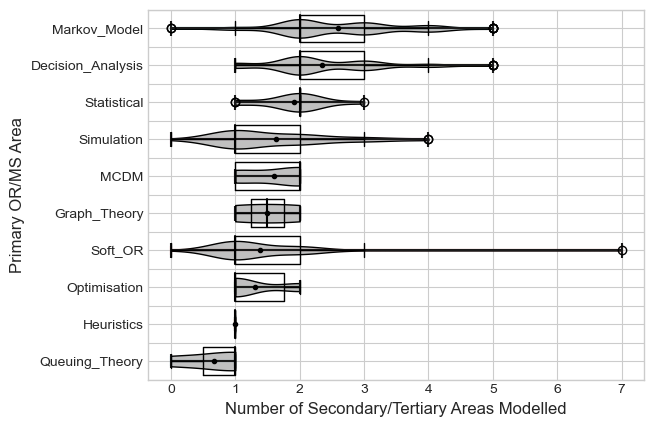

In [98]:
# Violin plots and boxplots for the OR areas vs number of secondary/tertiary areas modelled
fig, ax = plt.subplots(1)
medianprops = dict(color="black",linewidth=1.5)
meanprops={"marker":".","markerfacecolor":"black", "markeredgecolor":"black"}
for pos, primary_area in enumerate(ordered_list_of_primary_areas):
    data = review_analysis[review_analysis[primary_area]==1]['Number of Secondary Care Areas']
    parts = ax.violinplot(data, positions=[pos], vert=False)
    for pc in parts['bodies']:
        pc.set_facecolor('silver')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    min_iqr, max_iqr = np.percentile(list(data), [0, 100])
    ax.hlines(pos, min_iqr, max_iqr, color='k', linestyle='-', lw=1.5)
    ax.vlines(min_iqr, pos-0.2, pos+0.2, lw=1.5, color='k')
    ax.vlines(max_iqr, pos-0.2, pos+0.2, lw=1.5, color='k')
    ax.boxplot(data, positions=[pos], vert=False, widths=0.75, showmeans=True, medianprops=medianprops, meanprops=meanprops)
ax.set_yticklabels(ordered_list_of_primary_areas)
plt.xlabel('Number of Secondary/Tertiary Areas Modelled', fontsize=12)
plt.ylabel('Primary OR/MS Area', fontsize=12)
# plt.grid(visible=True, which='major', axis='both')
plt.grid(visible=True, which='major', axis='x')
ax.set_yticks([-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], minor=True)
plt.grid(visible=True, which='minor', axis='y')
plt.savefig("plots/Primary_NumberSecondary.pdf", transparent=True, bbox_inches='tight')
plt.show()

In [99]:
for i, p in enumerate(list_of_primary_areas):
    print(i, p)

0 Decision_Analysis
1 Graph_Theory
2 Heuristics
3 Markov_Model
4 MCDM
5 Optimisation
6 Queuing_Theory
7 Simulation
8 Soft_OR
9 Statistical


In [100]:
year_published_labels = ['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [101]:
# Cross-analysis of OR area vs Year published
or_area_Year = cross_analysis(review_analysis, or_area_categories, or_area_labels, category2=year_published_categories, category_labels2=year_published_labels)

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


In [102]:
or_area_Year[['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']] = or_area_Year[['1991', '2021', '2022', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

In [103]:
year_or_area = or_area_Year.transpose()
year_or_area[['Decision Analysis', 'Graph Theory', 'Heuristics', 'Markov Model', 'MCDM', 'Optimisation', 'Queueing Theory', 'Simulation', 'Soft OR', 'Statistical Analysis']] = year_or_area[['Markov Model', 'Decision Analysis', 'Soft OR', 'Simulation', 'Statistical Analysis', 'Optimisation', 'MCDM', 'Heuristics', 'Queueing Theory', 'Graph Theory']]

In [104]:
year_or_area.rename(columns={'Decision Analysis': 'Markov Model', 'Graph Theory': 'Decision Analysis', 'Heuristics': 'Soft OR', 'Markov Model': 'Simulation', 'MCDM': 'Statistical Analysis', 'Optimisation': 'Optimisation', 'Queueing Theory': 'MCDM', 'Simulation': 'Heuristics', 'Soft OR': 'Queueing Theory', 'Statistical Analysis': 'Graph Theory'})

,Markov Model,Decision Analysis,Soft OR,Simulation,Statistical Analysis,Optimisation,MCDM,Heuristics,Queueing Theory,Graph Theory
1991,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
year_or_area.loc["1990"] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [106]:
year_or_area = year_or_area.sort_index()
year_or_area = year_or_area.drop(index=['2022'])

In [107]:
year_or_area3 = year_or_area.copy()
year_or_area3 = year_or_area3.drop(index='1990')
year_or_area3 = year_or_area3.rename(columns={'Decision Analysis': 'Markov Model', 'Graph Theory': 'Decision Analysis', 'Heuristics': 'Soft OR', 'Markov Model': 'Simulation', 'MCDM': 'A', 'Optimisation': 'B', 'Queueing Theory': 'C', 'Simulation': 'D', 'Soft OR': 'E', 'Statistical Analysis': 'F'})
year_or_area3 = year_or_area3.drop(['A', 'B', 'C', 'D', 'E', 'F'], axis=1)
year_or_area3

,Markov Model,Decision Analysis,Soft OR,Simulation
1991,0.0,1.0,0.0,0.0
1992,0.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.0
1994,0.0,2.0,0.0,0.0
1995,1.0,2.0,0.0,0.0
1996,1.0,1.0,0.0,0.0
1997,0.0,1.0,1.0,0.0
1998,0.0,2.0,0.0,0.0
1999,0.0,4.0,0.0,0.0
2000,2.0,2.0,0.0,0.0


C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/2824209000.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(year_published_labels5, fontsize=6)
C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/2824209000.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(year_published_labels5, fontsize=6)
C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/2824209000.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(year_published_labels5, fontsize=6)
C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/2824209000.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(year_published_labels5, fontsize=6)


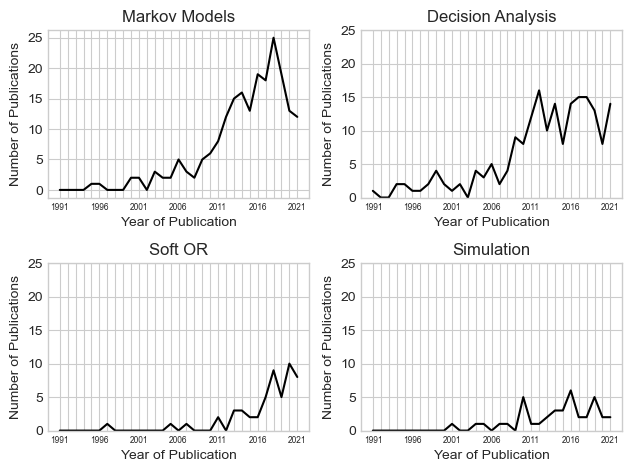

In [108]:
# Separate line graphs  for the number of publications per year for the four most popular OR Areas
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(year_or_area3['Markov Model'], linestyle='-', color='Black')
axs[0, 0].set_title('Markov Models')
axs[0, 0].set_xticklabels(year_published_labels5, fontsize=6)
axs[0, 1].plot(year_or_area3['Decision Analysis'], linestyle='-', color='Black')
axs[0, 1].set_title('Decision Analysis')
axs[0, 1].set_ylim([0, 25])
axs[0, 1].set_xticklabels(year_published_labels5, fontsize=6)
axs[1, 0].plot(year_or_area3['Soft OR'], linestyle='-', color='Black')
axs[1, 0].set_title('Soft OR')
axs[1, 0].set_ylim([0, 25])
axs[1, 0].set_xticklabels(year_published_labels5, fontsize=6)
axs[1, 1].plot(year_or_area3['Simulation'], linestyle='-', color='Black')
axs[1, 1].set_title('Simulation')
axs[1, 1].set_ylim([0, 25])
axs[1, 1].set_xticklabels(year_published_labels5, fontsize=6)

for ax in axs.flat:
    ax.set(xlabel='Year of Publication', ylabel='Number of Publications')

fig.tight_layout(pad=1.0)
plt.savefig("plots/MethodsYears.pdf", transparent=True, bbox_inches='tight')

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(0.5, 34.41979166666667, 'Data Source')

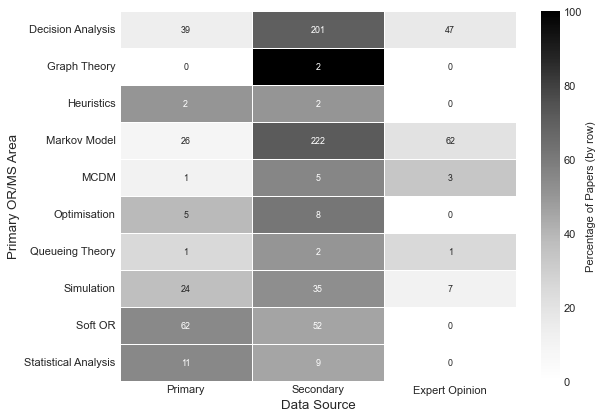

In [109]:
# Cross-analysis for the OR area vs Data source
or_area_data_source = cross_analysis(review_analysis, or_area_categories, or_area_labels, data_source_categories, data_source_labels)
or_area_data_source_labels = or_area_data_source.to_numpy() # For custom labels for the heatmap

# Plot a heatmap for the cross-analysis
normalised_heat_map(or_area_data_source, annotate=or_area_data_source_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.ylabel('Primary OR/MS Area', fontsize=12)
plt.xlabel('Data Source', fontsize=12)

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


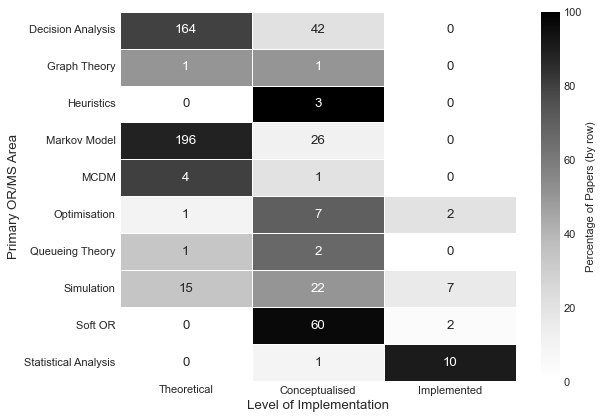

In [110]:
# Cross-analysis or OR Area vs level of implementation
or_area_implementation = cross_analysis(review_analysis, or_area_categories, or_area_labels, level_of_implementation_categories, implementation_labels)
or_area_implementation_labels = or_area_implementation.to_numpy() # For custom labels for the heatmap

# Plot a heatmap for the cross-analysis
normalised_heat_map(or_area_implementation, annotate=or_area_implementation_labels, cbar_kws={'label': 'Percentage of Papers (by row)'}, annotkws={"size":12})
plt.ylabel('Primary OR/MS Area', fontsize=12)
plt.xlabel('Level of Implementation', fontsize=12)
plt.savefig("plots/Primary_implementation.pdf", transparent=True, bbox_inches='tight')

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(0.5, 34.41979166666667, 'Secondary/Tertiary Care Area')

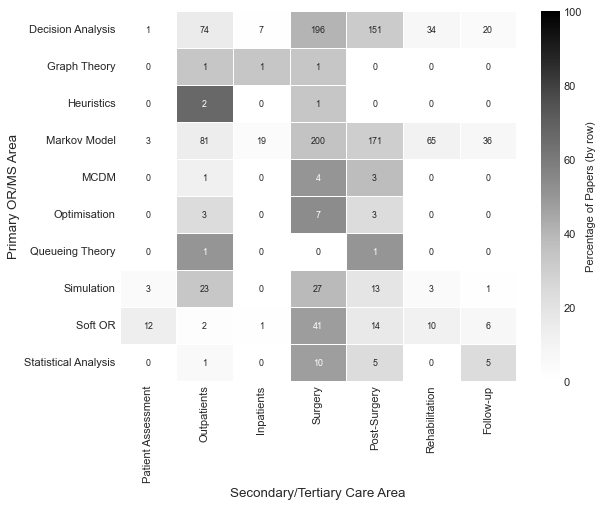

In [111]:
# Cross analysis of OR Area vs secondary/tertiary care pathway areas
or_area_pathway = cross_analysis(review_analysis, or_area_categories, or_area_labels, pathway_categories, pathway_labels)
or_area_pathway_labels = or_area_pathway.to_numpy() # For custom labels for the heatmap

# Plot a heatmap for the cross-analysis
normalised_heat_map(or_area_pathway, annotate=or_area_pathway_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.ylabel('Primary OR/MS Area', fontsize=12)
plt.xlabel('Secondary/Tertiary Care Area', fontsize=12)

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(0.5, 34.46666666666667, 'Secondary/Tertiary Care Area')

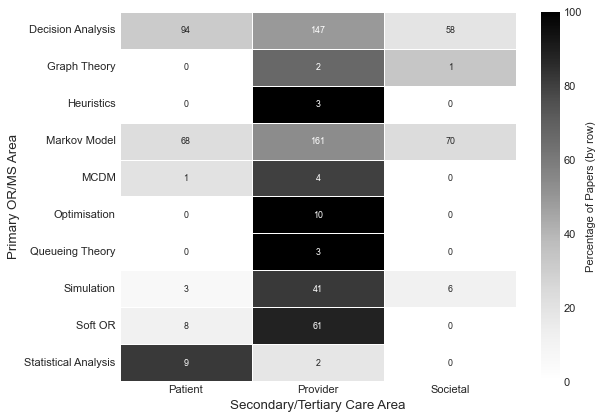

In [112]:
# Cross-analysis of OR Area vs perspective
or_area_perspective = cross_analysis(review_analysis, or_area_categories, or_area_labels, perspective_categories, perspective_labels)
or_area_perspective_labels = or_area_perspective.to_numpy() # For custom labels for the heatmap

# Plot a heatmap for the cross-analysis
normalised_heat_map(or_area_perspective, annotate=or_area_perspective_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.ylabel('Primary OR/MS Area', fontsize=12)
plt.xlabel('Secondary/Tertiary Care Area', fontsize=12)

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(61.61979166666667, 0.5, 'Research Aim')

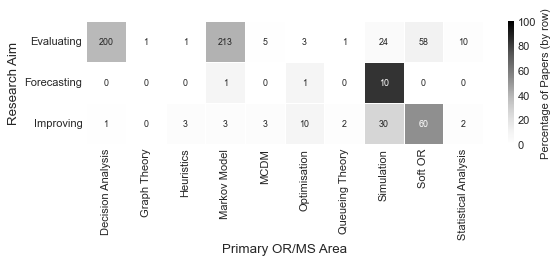

In [113]:
# Cross-analysis of OR Area vs research aims
or_area_research_aims = cross_analysis(review_analysis, research_aims_categories, research_aims_labels, or_area_categories, or_area_labels)
or_area_research_aims_labels = or_area_research_aims.to_numpy() # For custom labels for the heatmap

# Plot a heatmap for the cross-analysis
normalised_heat_map(or_area_research_aims, fig_size=(8,2), annotate=or_area_research_aims_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.xlabel('Primary OR/MS Area', fontsize=12)
plt.ylabel('Research Aim', fontsize=12)

### Primary OR/MS Method

In [114]:
# Labels for figures for primary method category
primary_method_labels = ['ABM', 'AHP', 'Break Even Analysis', 'Decision Tree', 'Delphi Method', 'DES', 'Genetic Algorithm', 'Goal Programming', 'Integer Programming', 'Knapsack', 'Mathematical Model', 'Microsimulation', 'MILP', 'Markov Model', 'Monte Carlo', 'Neighbourhood Search', 'PSO', 'Queueing Model', 'Scatter Search', 'SNA', 'Statistical Analysis', 'System Dynamics', 'Tabu Search']

primary_method = literature_analysis(review_analysis, primary_method_categories)
primary_method

[2, 5, 2, 204, 62, 32, 1, 1, 2, 1, 1, 2, 8, 223, 6, 1, 1, 3, 1, 2, 11, 2, 1]

In [115]:
percentage(primary_method)

[0.40650406504065045,
 1.0162601626016259,
 0.40650406504065045,
 41.46341463414634,
 12.601626016260163,
 6.504065040650407,
 0.20325203252032523,
 0.20325203252032523,
 0.40650406504065045,
 0.20325203252032523,
 0.20325203252032523,
 0.40650406504065045,
 1.6260162601626018,
 45.32520325203252,
 1.2195121951219512,
 0.20325203252032523,
 0.20325203252032523,
 0.6097560975609756,
 0.20325203252032523,
 0.40650406504065045,
 2.2357723577235773,
 0.40650406504065045,
 0.20325203252032523]

### Secondary OR/MS Method

In [116]:
# Labels for figures for secondary method category
secondary_method_labels = ['Delphi Method', 'DES', 'Microsimulation', 'Monte Carlo', 'Sensitivity Analysis', 'Unnamed Simulation', 'No Secondary']
secondary_method_labels2 = ['Delphi Method', 'No Secondary',  'Simulation', 'Sensitivity Analysis']

secondary_method = literature_analysis(review_analysis, secondary_method_categories)
secondary_method

[14, 1, 6, 123, 363, 1, 112]

In [117]:
secondary_method2 = [14, 112, 131, 363]

In [118]:
percentage(secondary_method2)

[2.8455284552845526, 22.76422764227642, 26.6260162601626, 73.78048780487805]

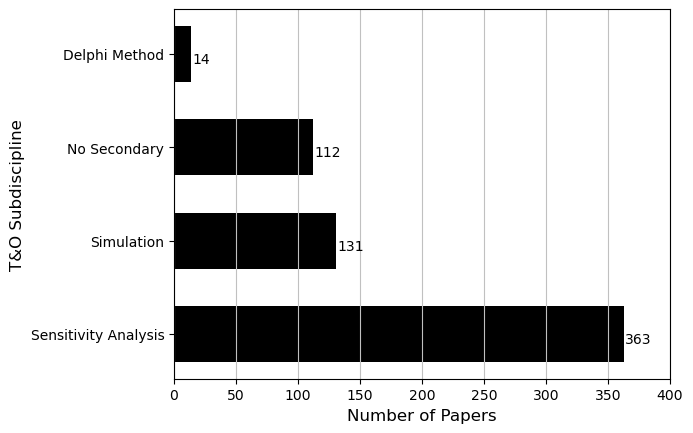

In [119]:
# Bar chart for the results of the secondary method classification
plt.rcdefaults()
fig, ax = plt.subplots()
plt.xlim([0,400])
plt.style.use('default')
plt.grid(color='silver', axis='x')

y_pos = np.arange(len(secondary_method_labels2))

ax.barh(secondary_method_labels2, secondary_method2, align='center', color='black', height=0.6) 
ax.set_yticks(y_pos)
ax.invert_yaxis()  
ax.set_xlabel('Number of Papers', fontsize=12)
ax.set_ylabel('T&O Subdiscipline', fontsize=12)
for i, v in enumerate(secondary_method2):
    ax.text(v + 1, i+.1, str(v), color='black')

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(57.77777777777778, 0.5, 'Primary OR/MS Area')

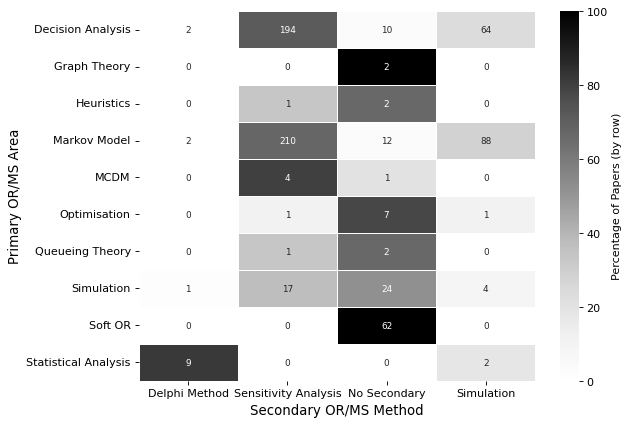

In [120]:
# Cross-analysis of OR Area vs Secondary method
or_area_Secondary = cross_analysis(review_analysis, or_area_categories, or_area_labels, secondary_method_categories, secondary_method_labels)
column_names = ['DES', 'Microsimulation', 'Monte Carlo', 'Unnamed Simulation']
or_area_Secondary['Simulation'] = or_area_Secondary[column_names].sum(axis=1)
or_area_Secondary = or_area_Secondary.drop(column_names, axis=1)
labels2 = or_area_Secondary.to_numpy() # For custom labels for the heatmap

# Plot a heatmap for the cross-analysis
normalised_heat_map(or_area_Secondary, fig_size=(8, 6), colourmap='Greys', line_width=.5, annotate=labels2, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.xlabel('Secondary OR/MS Method', fontsize=12)
plt.ylabel('Primary OR/MS Area', fontsize=12)

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(57.77777777777778, 0.5, 'Secondary OR/MS Method')

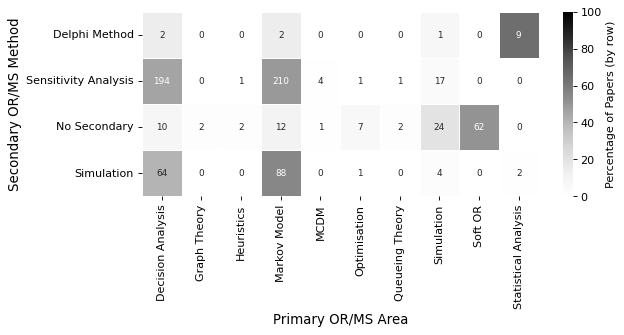

In [121]:
# Cross-analysis of OR Area vs secondary method
or_area_Secondary = cross_analysis(review_analysis, or_area_categories, or_area_labels, secondary_method_categories, secondary_method_labels)
column_names = ['DES', 'Microsimulation', 'Monte Carlo', 'Unnamed Simulation']
or_area_Secondary['Simulation'] = or_area_Secondary[column_names].sum(axis=1)
or_area_Secondary = or_area_Secondary.drop(column_names, axis=1)
or_area_Secondary = or_area_Secondary.transpose()
or_area_Secondary_labels = or_area_Secondary.to_numpy() # For custom labels for the heatmap

# Plot a heatmap for the cross-analysis
normalised_heat_map(or_area_Secondary, fig_size=(8, 3), colourmap='Greys', line_width=.5, annotate=or_area_Secondary_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.xlabel('Primary OR/MS Area', fontsize=12)
plt.ylabel('Secondary OR/MS Method', fontsize=12)

### Outcome

In [122]:
outcome_labels = ['Cost', 'Health', 'Time'] # Labels for figures for outcome category

outcome = literature_analysis(review_analysis, outcome_categories)
outcome

[336, 409, 42]

In [123]:
percentage(outcome)

[68.29268292682927, 83.130081300813, 8.536585365853659]

In [124]:
# Calculate the overlaps of classifications for the outcomes category
outcome_by_class = []
outcome_by_class.append(len(review_analysis[review_analysis[['Cost', 'Health', 'Time']].apply(tuple,axis=1)==(1, 0, 0)]))
outcome_by_class.append(len(review_analysis[review_analysis[['Cost', 'Health', 'Time']].apply(tuple,axis=1)==(0, 1, 0)]))
outcome_by_class.append(len(review_analysis[review_analysis[['Cost', 'Health', 'Time']].apply(tuple,axis=1)==(1, 1, 0)]))
outcome_by_class.append(len(review_analysis[review_analysis[['Cost', 'Health', 'Time']].apply(tuple,axis=1)==(0, 0, 1)]))
outcome_by_class.append(len(review_analysis[review_analysis[['Cost', 'Health', 'Time']].apply(tuple,axis=1)==(1, 0, 1)]))
outcome_by_class.append(len(review_analysis[review_analysis[['Cost', 'Health', 'Time']].apply(tuple,axis=1)==(0, 1, 1)]))
outcome_by_class.append(len(review_analysis[review_analysis[['Cost', 'Health', 'Time']].apply(tuple,axis=1)==(1, 1, 1)]))
outcome_by_class

[53, 122, 275, 23, 7, 11, 1]

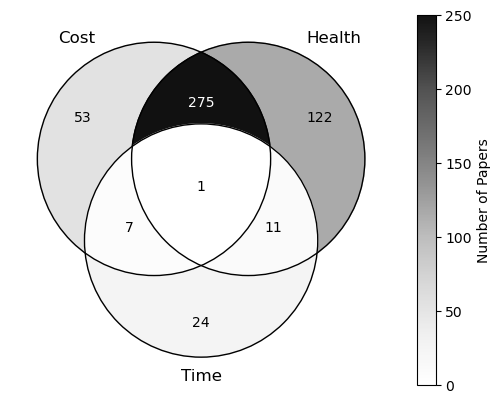

In [125]:
# Plot a venn-diagram for the results of the outcomes category
v = venn3(subsets = (1, 1, 1, 1, 1, 1, 1), set_labels = ('Cost', 'Health', 'Time'), alpha = 1)

list_integers = (51, 111, 240, 23, 6, 10, 1)
cmap = cm.Greys(np.array(list_integers))

list_integers2 = range(0, 240)
cmap2 = cm.Greys(np.array(list_integers2))

all_cells = ("100", "010", "110", "001", "101", "011", "111")
all_texts = ("53", "122", "275", "24", "7", "11", "1")
all_colours = (0, 1, 2, 3, 4, 5, 6)

for cell, text, colour in zip(all_cells, all_texts, all_colours):
    v.get_label_by_id(cell).set_text(text)
    v.get_patch_by_id(cell).set_color(cmap[colour])
    
v.get_label_by_id("110").set_color("white")
    
venn3_circles(subsets = (1, 1, 1, 1, 1, 1, 1), linewidth=1)

my_cmap = mcolors.ListedColormap(cmap2, name='my_colormap') 
norm = mpl.colors.Normalize(vmin=0, vmax=250)
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
plt.colorbar(sm, label='Number of Papers')
plt.savefig("plots/Outcomes.pdf", transparent=True, bbox_inches='tight')

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


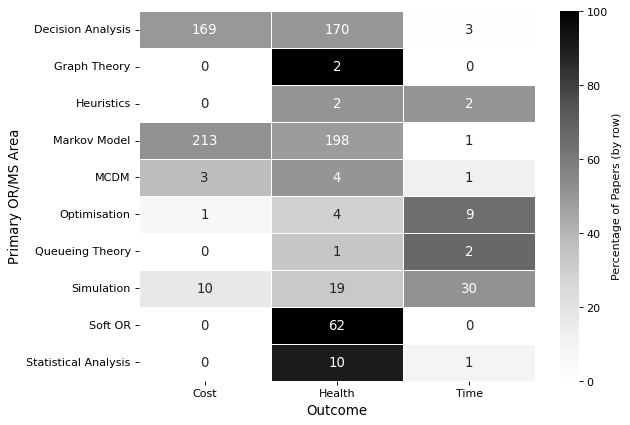

In [126]:
# Cross-analysis of OR Area vs outcome
or_area_outcome = cross_analysis(review_analysis, or_area_categories, or_area_labels, outcome_categories, outcome_labels)
or_area_outcome_labels = or_area_outcome.to_numpy() # For custom labels for the heatmap

# Plot a heatmap for the cross-analysis
normalised_heat_map(or_area_outcome, annotate=or_area_outcome_labels, cbar_kws={'label': 'Percentage of Papers (by row)'}, annotkws={"size":12})
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Primary OR/MS Area', fontsize=12)
plt.savefig("plots/PrimaryOR_Outcome.pdf", transparent=True, bbox_inches='tight')

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(57.777777777777786, 0.5, 'Research Aim')

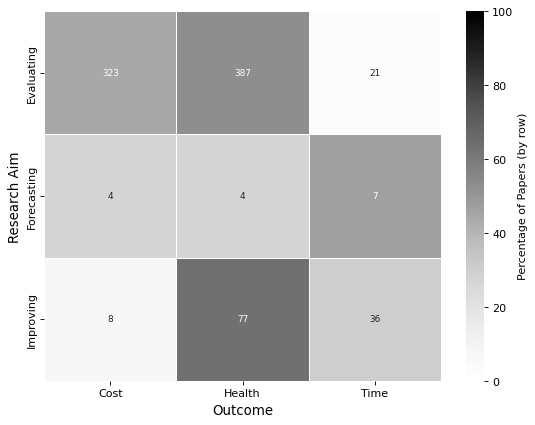

In [127]:
# Cross-analysis of outcome vs research aim
outcome_research_aim = cross_analysis(review_analysis, research_aims_categories, research_aims_labels, outcome_categories, outcome_labels)
outcome_research_aim_labels = outcome_research_aim.to_numpy() # For custom labels for the heatmap

# Plot a heatmap for the cross-analysis
normalised_heat_map(outcome_research_aim, annotate=outcome_research_aim_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Research Aim', fontsize=12)

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(57.777777777777786, 0.5, 'Modelling scope')

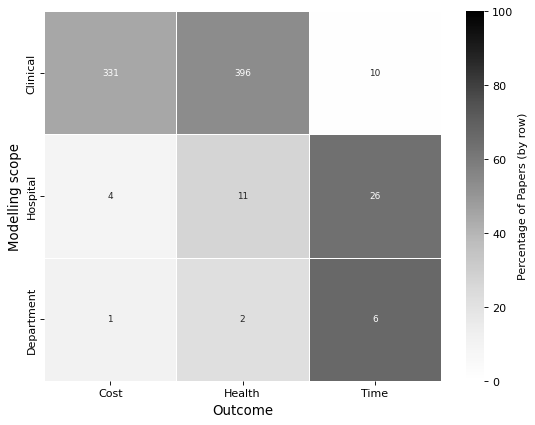

In [128]:
# Cross-analysis of outcome vs. scope
outcome_scope = cross_analysis(review_analysis, scope_categories, scope_labels, outcome_categories, outcome_labels)
outcome_scope_labels = outcome_scope.to_numpy() # For custom labels for the heatmap

# Plot a heatmap for the cross-analysis
normalised_heat_map(outcome_scope, annotate=outcome_scope_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Modelling scope', fontsize=12)

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(57.777777777777786, 0.5, 'Outcome')

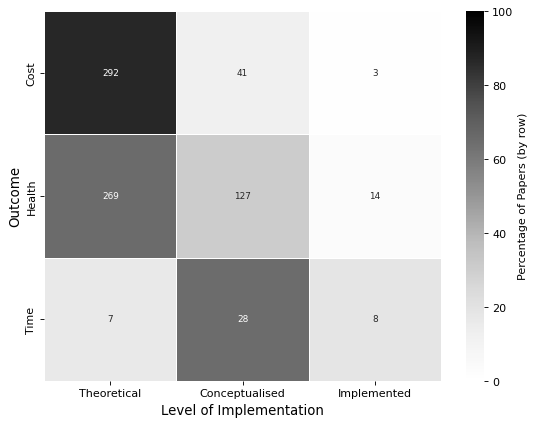

In [129]:
# Cross-analysis of outcome vs level of implementation
outcome_implementation = cross_analysis(review_analysis, outcome_categories, outcome_labels, level_of_implementation_categories, implementation_labels)
outcome_implementation_labels = outcome_implementation.to_numpy() # For custom labels for the heatmap

# Plot a heatmap for the cross-analysis
normalised_heat_map(outcome_implementation, annotate=outcome_implementation_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.xlabel('Level of Implementation', fontsize=12)
plt.ylabel('Outcome', fontsize=12)

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


Text(57.777777777777786, 0.5, 'Primary OR/MS Area')

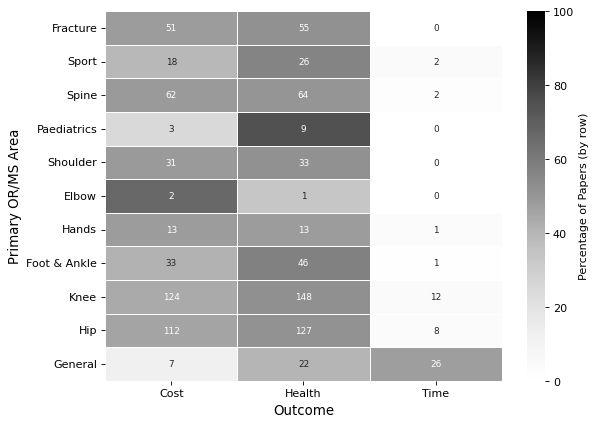

In [130]:
# Cross-analysis of T&O subdiscipline vs outcome
t_and_o_outcome = cross_analysis(review_analysis, t_and_o_area_categories, t_and_o_area_labels, outcome_categories, outcome_labels)
t_and_o_outcome_labels = t_and_o_outcome.to_numpy() # For custom labels for the heatmap

# Plot a heatmap for the cross-analysis
normalised_heat_map(t_and_o_outcome, annotate=t_and_o_outcome_labels, cbar_kws={'label': 'Percentage of Papers (by row)'})
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Primary OR/MS Area', fontsize=12)

### Planning Decisions

In [131]:
# Labels for the figures for the planning decisions category
planning_level_labels = ['Strategic', 'Tactical', 'Operational (Offline)', 'Operational (Online)']
planning_level_categories2 = planning_level_categories.copy()
planning_level_categories2.pop()
 
planning_level = literature_analysis(review_analysis, planning_level_categories)
planning_level.pop() # Remove the no decision level classification
planning_level

[27, 17, 7, 2]

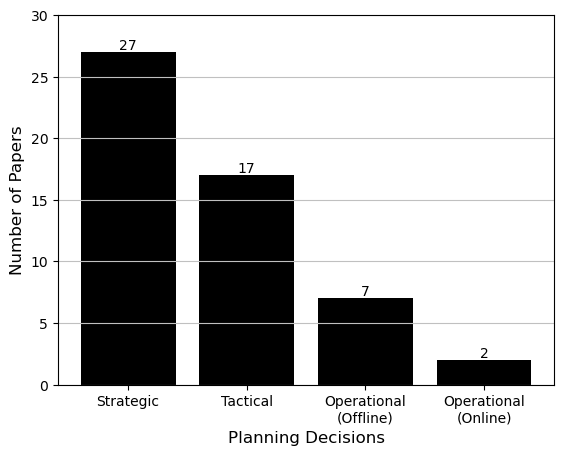

In [132]:
# Plot bar chart for the results of the planning decisions category
fig = plt.figure()
plt.ylim([0,30])
plt.grid(color='silver', axis='y')
plt.bar(planning_level_labels, planning_level, color='Black')
xlabels_new = [label.replace(' ', '\n') for label in planning_level_labels]
plt.xlabel('Planning Decisions', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
add_labels(planning_level, planning_level, plus=0.2)
plt.xticks(range(len(planning_level_labels)), xlabels_new)
plt.savefig("plots/PlanningDecision.pdf", transparent=True, bbox_inches='tight')

In [133]:
# Cross-analysis of JCR category vs. Planning decison level
jcr_decision = cross_analysis(review_analysis, jcr_category_categories, jcr_category_labels, planning_level_categories2, planning_level_labels)
jcr_decision

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


,Strategic,Tactical,Operational (Offline),Operational (Online)
HCSS,7.0,3.0,0.0,0.0
HPS,11.0,5.0,1.0,0.0
IE,1.0,2.0,3.0,0.0
MI,2.0,1.0,0.0,0.0
OR/MS,11.0,8.0,5.0,2.0
T&O,1.0,1.0,1.0,0.0
Other,3.0,2.0,0.0,0.0


In [134]:
planning_level_labels2 = ['Strategic', 'Tactical', 'Operational (Offline)', 'Operational (Online)', 'None']

In [135]:
# Cross-analysis of Planning decison level vs. scope
planning_scope = cross_analysis(review_analysis, scope_categories, scope_labels2, planning_level_categories2, planning_level_labels2)
planning_scope

C:\Users\c1611232\AppData\Local\Temp/ipykernel_25232/3738228684.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[m,n] = len(review_analysis[review_analysis[i]==1][review_analysis[j]==1]) # Set the (m,n)th entry of the data frame to equal the total of papers classified as both the ith entry of 'category', and jth entry of 'category2'


,Strategic,Tactical,Operational (Offline),Operational (Online),None
Clinical,6.0,3.0,1.0,0.0,0.0
Department,17.0,12.0,6.0,2.0,0.0
Hospital,4.0,2.0,0.0,0.0,0.0


### Functional Area

In [136]:
# Labels for the figures of the functional area category
functional_area_labels = ['Capacity Planning', 'Cost Analysis', 'Cost-Effectiveness', 'Cost-Utility', 'Expected-Value', 'Health Utility', 'Location Planning', 'Manufacturing', 'Medical Decisions', 'Medical Simulation', 'Patient Scheduling', 'Risk-Benefit', 'Staff Utilisation', 'System Design & Planning']
functional_area_labels2 = ['Location Planning', 'Manufacturing', 'Medical Simulation', 'Risk-Benefit', 'Staff Utilisation', 'Patient Scheduling', 'Health Utility', 'System Design & Planning', 'Capacity Planning', 'Expected-Value', 'Cost Analysis', 'Cost-Utility', 'Medical Decisions', 'Cost-Effectiveness']

functional_area = literature_analysis(review_analysis, functional_area_categories)
functional_area
functional_area2 = functional_area
functional_area

[0, 17, 33, 266, 34, 21, 14, 1, 1, 79, 1, 13, 1, 6, 16]

In [137]:
functional_area2.sort() # Sort the results from smallest to largest
functional_area2

[0, 1, 1, 1, 1, 6, 13, 14, 16, 17, 21, 33, 34, 79, 266]

In [138]:
percentage(functional_area2)

[0.0,
 0.20325203252032523,
 0.20325203252032523,
 0.20325203252032523,
 0.20325203252032523,
 1.2195121951219512,
 2.642276422764228,
 2.8455284552845526,
 3.2520325203252036,
 3.4552845528455287,
 4.2682926829268295,
 6.707317073170732,
 6.910569105691057,
 16.056910569105693,
 54.0650406504065]